# Notebook pour le clustering non-supervisé des titres
Ce code est divisé en deux parties :
## 1. Ajout, affinage des features
## 2. Algorithme(s) de clustering

D'abord on appelle la base :  n'hésitez pas à décommenter la ligne pour n'en avoir qu'une partie (plus rapide pour visualiser) en faisant varier N

In [3]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
import time

# Read recipe inputs
start=time.time()
base_phrase_clean = dataiku.Dataset("base_phrase_clean")
#N=200000
#base_phrase_clean_df = base_phrase_clean.get_dataframe(sampling='head',limit=N)
base_phrase_clean_df = base_phrase_clean.get_dataframe()
end=time.time()
print('Durée :',round((end-start)/60,2),' minutes')
print('Il y a ',len(np.unique(base_phrase_clean_df.num_etude)),"études")
base_phrase_clean_df

Durée : 4.34  minutes
Il y a  148 études


,phrase,num_etude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,<title>EI Munchhouse_V3</title>,1003691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"<h1><a name=""bookmark0""></a><span class=""font2...",1003691,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"<p><span class=""font20"" style=""font-weight:bol...",1003691,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"<p><span class=""font14"">Agence Aquitaine</span...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"<p><span class=""font14"">SAFEGE</span></p>",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,"<span class=""font21"">Disponible sur le site de...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2443030,"<a href=""http://www.clefdeschamps.info/""><span...",238301,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2443031,"<p><sup><a href=""#footnote14"">14</a></sup><a n...",238301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2443032,"<span class=""font0"" style=""font-weight:bold;"">...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Ajout et affinage des features

#### On rajoute les features :
* nombre de mots,
* nombre de caractères
* mais également nombre de caractères de la ligne html

In [4]:
from bs4 import BeautifulSoup
base_phrase_clean_df['phrase_2']=[BeautifulSoup(i,"html.parser").text for i in base_phrase_clean_df.phrase]
base_phrase_clean_df['f_mots']=[len(i.split(' ')) for i in base_phrase_clean_df.phrase_2]
base_phrase_clean_df['f_carac']=[len(i) for i in base_phrase_clean_df.phrase_2]
base_phrase_clean_df['html_carac']=[len(i) for i in base_phrase_clean_df.phrase]

In [5]:
base_phrase_clean_df.shape

(2443034, 47)

#### On rajoute indicatrice sommaire

In [44]:
import pickle
da=dataiku.Folder('lZ0B3sSL')
sup_50_num=pickle.load(open(da.get_path()+'num_etude_sup_50_titres.pickle','rb'))
indice_bon=[sommaire(base_phrase_clean_df[base_phrase_clean_df.num_etude==i].phrase_2.values)[0] for i in sup_50_num]
indice_bon

[101,
 87,
 51,
 9,
 31438,
 53,
 80,
 12,
 17,
 9,
 23,
 837,
 50,
 76,
 837,
 37,
 44,
 112,
 25,
 33,
 17,
 5,
 46,
 22341,
 74,
 14,
 50,
 49,
 50,
 6,
 13,
 153,
 15,
 7,
 58,
 69,
 69,
 36,
 41,
 9,
 16,
 43,
 1029,
 73,
 44,
 53,
 209,
 24,
 72,
 82,
 40,
 11676,
 33,
 87,
 69,
 15,
 19,
 54,
 63,
 42,
 50,
 87,
 21,
 14,
 20,
 11,
 4,
 6,
 7391,
 18,
 5,
 9,
 53,
 67,
 67,
 80,
 4,
 50,
 15,
 19,
 13]

In [45]:
np.median(indice_bon)

44.0

In [46]:
def sommaire(s):
    '''
    Fonction cherchant l'indice du début du sommaire dans la liste de phrase.
    '''
    somm=['SOMMAIRE','sommaire','Sommaire']
    s=list(s)
    indice=[s.index(k) for k in somm if k in s]
    if len(indice)==0:
        indice=[i for i in range(len(s)) if np.sum([1 if som in s[i] else 0 for som in somm])>0]
        if len(indice)>2:
            indice=[indice[0]]
        if len(indice)==0:
            from unidecode import unidecode
            technique=[unidecode('table des matières'.lower()),'non technique']
            indice=[i for i in range(len(s)) if np.sum([1 if som in unidecode(s[i].lower()) else 0 for som in technique])>0]
    #[list(verif_theo[verif_theo.label_k==0][verif_theo.num_etude==verif_theo.num_etude[0]].phrase_2.values).index(k) for k in somm if k in list(verif_theo[verif_theo.label_k==0][verif_theo.num_etude==verif_theo.num_etude[0]].phrase_2.values)]
    return indice

def light_cleaning(s):
    import re
    from unidecode import unidecode
    import numpy as np
    s=unidecode(s)
    s=re.sub(r'[^A-Za-z]',' ',s)
    s=s.lower()
    s=s.split(' ')
    s=list(np.unique(s))
    try:
        s.remove('')
        return s
    except:
        return s


def indice_relou(liste,indice_sommaire,seuil,seuil_c):
    '''
    Fonction qui permet de produire l'indicatrice sommaire pour les études récalcitrantes : c'est-à-dire dont le sommaire est difficilement détectable.
    Par exemple à cause de mauvaises répétitions des titres, d'absence de mots indiquants le début ou la fin du sommaire etc...
    '''
    import re
    output=None
    x=0
    #if procede=='basic':
    while output is None:
        x+=1
        a=light_cleaning(liste[indice_sommaire[0]+x]) 
        for j in range(indice_sommaire[0]+1+1,len(liste)):
            b=light_cleaning(liste[j])
            cnt = 0
            if len(a)==1:
                s=0
                for i in a:
                    if type(b)==str:
                        if re.search(i, b) is not None:
                            cnt = cnt + 1
                cnt=cnt/len(a)
                count=len(set(a)&set(b))/len(a)
            elif len(a)>1:
                aa=''.join([i for i in a])
                for i in aa:
                    if type(b)==str:
                        if re.search(i, b) is not None:
                            cnt = cnt + 1
                cnt=cnt/len(aa)
                count=len(set(aa)&set(b))/len(aa)
                s=0
                if type(b)==str:
                    for i in b:
                        if i in a:
                            s=1

            if (b in a) or (a in b) or (cnt>seuil) or (count>seuil_c) or (s>0):
                output=j
                #vector=np.ones(len([indice_sommaire[0]:j]))
                break
            else:
                continue
  #  elif procede=='further':
   #     a=light_cleaning(liste[indice_sommaire[0]]) 
    #else:
       # raise ValueError("Hum... Êtes-vous sûr que vous avez correctement spécifié le variable procede ? \nLes valeurs possibles sont 'basic' et 'further' (pour les études récalcitrantes).")
        
    return output

def ind_titres(verif,brutal=None,seuil_indice=100,seuil_sommaire=50,seuil=0.35,seuil_c=0.35):
    verif_theo=verif.copy()
    titres={}
    vector_=[]
    indexes = np.unique(verif_theo.num_etude, return_index=True)[1]
    #print(indexes)
    try:
        interval=[verif_theo.num_etude[index] for index in sorted(indexes)]
    except:
        verif_theo=verif_theo.reset_index(drop=True)
        interval=[verif_theo.num_etude[index] for index in sorted(indexes)]
    #print(interval)
    h=0
    for i in interval:
        print("On étudie l'étude :",i)
        liste=verif_theo[verif_theo.num_etude==i].phrase_2.values
        vector=np.zeros(len(liste))
        vector_.append(vector)
        h=h+len(vector)
        #vector_.append(vector)
        indice_sommaire=sommaire(liste)
        if len(indice_sommaire)>0:
            a=light_cleaning(liste[indice_sommaire[0]+1]) #hypothèse donc que le 1er titre vient après le sommaire
            print("L'indice de début de sommaire pour l'étude est",indice_sommaire[0],a)
            for j in range(indice_sommaire[0]+1+1,len(liste)):
                b=light_cleaning(liste[j])
                if a==b:
                    vector_[interval.index(i)][indice_sommaire[0]:j]=1
                    break
                else:
                    continue
            if np.sum(vector_[interval.index(i)])>0:
                print("Il y a un sommaire pour l'étude.")
            elif np.sum(vector_[interval.index(i)])==0:
                print('On tente la nouvelle méthode.')
                j=indice_relou(liste,indice_sommaire,seuil,seuil_c)
                if j is not None:
                    vector_[interval.index(i)][indice_sommaire[0]:j]=np.ones(len(range(indice_sommaire[0],j)))
                    ss=np.sum(vector_[interval.index(i)])
                    if ss>seuil_sommaire:
                        print("Il y a un sommaire pour l'étude.")
                    elif (ss>0) and (ss<seuil_sommaire) and (brutal is not None) and (indice_sommaire[0]<seuil_indice):
                        print("Hum... Le sommaire semble petit :",ss)
                        try:
                            vector_[interval.index(i)][indice_sommaire[0]:brutal+indice_sommaire[0]]=np.ones(len(range(indice_sommaire[0],brutal+indice_sommaire[0])))
                            print("On a pris les lignes de ",indice_sommaire[0],"à",indice_sommaire[0]+brutal)
                        except:
                            vector_[interval.index(i)][indice_sommaire[0]:brutal]=np.ones(len(range(indice_sommaire[0],brutal)))
                            print("On a pris les lignes de ",indice_sommaire[0],"à",brutal)
                        
                    else:
                        print("Pas de sommaire pour l'étude.")
                else:
                    print("Pour l'étude",i,"on n'a pas trouvé d'indice pour débuter le sommaire.")
        else:
            print("Pas de sommaire pour l'étude.")
    return vector_

In [31]:
base_phrase_clean_df

,phrase,num_etude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,phrase_2,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec
0,<title>EI Munchhouse_V3</title>,1003691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,EI Munchhouse_V3,2,16,31,0.0,0.0,0.0,0
1,"<h1><a name=""bookmark0""></a><span class=""font2...",1003691,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,1,2,113,0.0,0.0,0.0,0
2,"<p><span class=""font20"" style=""font-weight:bol...",1003691,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,1,4,65,0.0,0.0,0.0,0
3,"<p><span class=""font14"">Agence Aquitaine</span...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Agence Aquitaine,2,16,51,0.0,0.0,0.0,0
4,"<p><span class=""font14"">SAFEGE</span></p>",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAFEGE,1,6,41,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,"<span class=""font21"">Disponible sur le site de...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible sur le site de Réseau de Transport ...,12,68,96,0.0,0.0,0.0,0
2443030,"<a href=""http://www.clefdeschamps.info/""><span...",238301,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://www.clefdeschamps.info/,1,30,103,0.0,0.0,0.0,0
2443031,"<p><sup><a href=""#footnote14"">14</a></sup><a n...",238301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,1,2,73,0.0,0.0,0.0,0
2443032,"<span class=""font0"" style=""font-weight:bold;"">...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2,1,65,0.0,0.0,0.0,0


In [47]:
start=time.time()
#3ème version, ici on prend brutalement les 200 lignes après le mot "sommaire"
ouais=ind_titres(base_phrase_clean_df,brutal=200) 
end=time.time()
print("L'indicatrice a pris",round((end-start)/60),"minutes.")
import functools
import operator
c=functools.reduce(
    operator.iconcat,ouais,[])
#print(len(c))
base_phrase_clean_df['ind_sommaire']=c

On étudie l'étude : 1003691
L'indice de début de sommaire pour l'étude est 44 ['non', 'resume', 'technique']
Il y a un sommaire pour l'étude.
On étudie l'étude : 100689
L'indice de début de sommaire pour l'étude est 101 ['demandeur', 'du', 'presentation']
Il y a un sommaire pour l'étude.
On étudie l'étude : 100707
L'indice de début de sommaire pour l'étude est 87 ['d', 'le', 'maitre', 'ouvrage']
Il y a un sommaire pour l'étude.
On étudie l'étude : 1007353
L'indice de début de sommaire pour l'étude est 53 ['non', 'resume', 'technique']
Il y a un sommaire pour l'étude.
On étudie l'étude : 1007765
L'indice de début de sommaire pour l'étude est 0 ['contexte', 'le', 'preambule']
Il y a un sommaire pour l'étude.
On étudie l'étude : 1008101
Pas de sommaire pour l'étude.
On étudie l'étude : 1012199
L'indice de début de sommaire pour l'étude est 235 []
Il y a un sommaire pour l'étude.
On étudie l'étude : 1017145
L'indice de début de sommaire pour l'étude est 46 ['dbj']
Il y a un sommaire pour l

On tente la nouvelle méthode.
Hum... Le sommaire semble petit : 3.0
On a pris les lignes de  52 à 252
On étudie l'étude : 1257775
L'indice de début de sommaire pour l'étude est 63 ['preambule']
Il y a un sommaire pour l'étude.
On étudie l'étude : 125787
L'indice de début de sommaire pour l'étude est 37 ['preambule']
Il y a un sommaire pour l'étude.
On étudie l'étude : 1259375
Pas de sommaire pour l'étude.
On étudie l'étude : 1259674
L'indice de début de sommaire pour l'étude est 42 ['partie', 'presentation']
Il y a un sommaire pour l'étude.
On étudie l'étude : 1261738
L'indice de début de sommaire pour l'étude est 4 ['autorisation', 'ce', 'd', 'ddae', 'de', 'demande', 'dossier', 'environnementale', 'est', 'general', 'le', 'sommaire', 'suivant']
On tente la nouvelle méthode.
Il y a un sommaire pour l'étude.
On étudie l'étude : 1264388
L'indice de début de sommaire pour l'étude est 87 ['non', 'resume', 'technique']
Il y a un sommaire pour l'étude.
On étudie l'étude : 126684
L'indice de d

In [39]:
numero=np.unique(base_phrase_clean_df.num_etude)
num_relou=[i for i in numero if np.sum(base_phrase_clean_df[base_phrase_clean_df.num_etude==i].ind_sommaire)==0]
index=[True if base_phrase_clean_df.num_etude[i] in num_relou else False for i in base_phrase_clean_df.index]
base_relou=base_phrase_clean_df[index]
print("Les documents vides représentent :",round(len(base_relou)/len(base_phrase_clean_df)*100,2),'% des lignes de la base initiale')
print("On a réussi à traiter ",round((1-len(np.unique(base_relou.num_etude))/len(numero))*100,2),"% des documents.")
print("Il y a ",len(np.unique(base_relou.num_etude)),"études vides")

Les documents vides représentent : 1.0 % des lignes de la base initiale
On a réussi à traiter  96.62 % des documents.
Il y a  5 études vides


In [40]:
base_phrase_clean_df[base_phrase_clean_df.ind_sommaire==1].phrase_2

44                                                  Sommaire
45                                  \n1.Résumé non technique
46                 \n1.1 Présentation synthétique du projet 
47                         \n1.2 Synthèse de l’état initial 
48         \n1.3 Synthèse des impacts et des mesures asso...
                                 ...                        
2431423    \nFigure 51 : Lisières forestières au Nord d'O...
2431424    \nFigure 52 : Le château de Bussy-Rabutin (mon...
2431425    \nFigure 53 : Le site inscrit « Ruines du chât...
2431426    \nFigure 54 : Carte des secteurs résidentiels ...
2431427    \nFigure 55 : Le secteur ouest du parc de la B...
Name: phrase_2, Length: 170805, dtype: object

Après avoir analysé les résultats en bout de pipeline : on a intérêt à bien travailler cette variable, beaucoup de gains possibles à travers elle.

On va donc raffiner cette variable.

De plus, en sortant les phrases liées à l'indicatrice de sommaire, on voit que celle-ci ne peut pas être utilisée comme règle directe, car il y a beaucoup de déchets, plus qu'après tout le pipe (bien qu'il soit assez conséquent, bien que peu couteux en termes de calcul)

In [48]:
titres=base_phrase_clean_df[base_phrase_clean_df.ind_sommaire==1].phrase_2
for i in titres.index:
    print(titres[i])

Sommaire

1.Résumé non technique

1.1 Présentation synthétique du projet 

1.2 Synthèse de l’état initial 

1.3 Synthèse des impacts et des mesures associées 

2.Présentation du demandeur 

2.1 Présentation générale d’ENGIE

2.2 ENGIE Green : un leader des énergies renouvelables en France 

2.3 Le solaire avec ENGIE Green 

2.4 Contacts

3.Description du projet 

3.1 Localisation du projet

3.2 Nature et objet de l’opération 

3.3 Généralités - Principe de base du photovoltaïque

3.4 Présentation des installations projetées

3.5 Travaux en vue de l’implantation des panneaux photovoltaïques

3.6 Mise en place d’un « chantier propre » 

3.7 Appréciation sommaire des dépenses 

3.8 Synthèse des caractéristiques générales et technique du projet 

3.9 Réglementation applicable 

4.Démantèlement et remise en état du site 

4.1 Devenir du site en fin de vie des modules 

4.2 Recyclage et valorisation des éléments

4.3 Remise en état des terrains 

5.Justification du choix d’aménagement et sol

2.6.3. Qualité de l'air, odeurs, poussières

2.6.4. Émissions lumineuses

2.6.5. Hygiène et salubrité publique

2.6.5.1. Traitement des eaux usées domestiques et pluviales

2.6.5.2. Adduction d'eau potable

2.6.5.3. Lutte contre les incendies

2.6.5.4. Collecte des déchets

2.6.6. Réseaux divers

2.6.6.1. Réseaux électriques

2.6.6.2. Réseau d'eau potable

2.7. Conclusion : les enjeux du site après analyse de l'état actuel de l'environnement

3. DESCRIPTION DES INCIDENCES NOTABLES OUE LE PROJET EST SUSCEPTIBLE D'AVOIR SUR L'ENVIRONNEMENT - MESURES DE RÉDUCTION ET DE COMPENSATION DES EFFETS NÉGATIFS

3.1. Situation du projet par rapport aux servitudes d'utilité publique, aux risques et aux contraintes

3.1.1. Servitude d'utilité publique - Mesures associées

3.1.2. Risques majeurs - Mesures associées
urboTOLor

3.1.2.1. Inondation

3.1.2.2. Mouvements de terrain

3.1.2.3. Séisme

3.1.2.4. Transport de matières dangereuses

3.1.2.5. Prise en compte du réseau de biogaz

3.1.3. Contraintes


3.2.1.2. Incidences du projet sur le climat

3.2.2. Incidences directes sur les facteurs climatiques et l'apparition de micro-climat

3.3. Incidences du projet sur la topographie, les terres, le sol et le sous-sol - Mesures associées

3.3.1. Incidences du projet sur la qualité des terres, du sol et du sous-sol - Mesures

3.3.1.1. Incidences du projet sur la qualité des terres, du sol et du sous-sol

3.3.1.2. Mesures en faveur de la préservation de la qualité des terres, du sol et du sous-sol

3.3.2. Incidences du projet sur la stabilité des terres, du sol et du sous-sol - Mesures

3.3.2.1. Incidences et mesures en phase travaux

3.3.2.2. Incidences et mesures en phase exploitation

3.3.3. Incidences du projet sur la topographie - Mesures

3.4. Incidences du projet sur les eaux superficielles et souterraines - Mesures

3.4.1. Incidences sur les eaux superficielles - Mesures

3.4.1.1. Incidences qualitatives et mesures

3.4.1.2. Incidences quantitatives et mesures

3.4.1.3. Les incidenc

5.8. Champs électromagnétiques
COMPATIBILITE DU PROJET AVEC LES DOCUMENTS D’URBANISME ET LES PLANS, SCHEMAS ET PROGRAMMES EXISTANTS

1. Les documents d’urbanisme locaux

2. SDAGE Loire-Bretagne

3. SRCAE du Limousin

4. Servitudes ICPE et le code minier
EFFETS CUMULATIFS AVEC D’AUTRES PROJETS CONNUS 237

1. Autres projets dans le périmètre d’étude éloigné

2. Autres projets photovoltaïques
SYNTHESE ET CONCLUSIONS
ANALYSES DES METHODES ET DES DIFFICULTES
RENCONTREES

1. Détails de l’étude faune-flore

1.1. Bibliographie utilisée, bases de données consultées et organismes rencontrés

1.2. Prospection de terrain

1.2.1. Périodes de prospection

1.2.2. Difficultés rencontrées

1.2.3. Protocole flore / Habitats

1.2.4. Protocole Faune

1.2.5. Bio-évaluation

2. Détails de l’étude paysagère

2.1. Visite de terrain

2.2. Bibliographie

2.3. Sites internet
ANNEXES
TABLEAUX

Tableau 1 : Synthèse des impacts du projet et des mesures associées -Fonctionnement du stockage de résidus

Tableau 2 : S

 Reseaux
 
3.5.6.
 Environnement sonore
 

3.5.6.1. Définitions 

3.5.6.2. Contexte réglementaire 

3.5.6.3. Présentation du site et de la mesure acoustique 

3.5.6.4. Résultats de la mesure et définition des critères 

4. ETUDES PREALABLES A LA DEFINITION DU PROJET 

4.1. PRESENTATION DU CONTEXTE 

4.2. DEFINITION DES BESOINS A SATISFAIRE 
4.2.1.
 Estimation des flux de dechets a collecter
 
4.2.2.
 Estimation des flux d’USAGERS a accueillir
 
4.2.3.
 Estimation des besoins en surface utile amenagee
 

4.3. RECHERCHE DE SITE POUR L’IMPLANTATION DE LA FUTURE INSTALLATION 
4.3.1.
 Definition de la position ideale
 
4.3.2.
 Definition des ecarts de temps de trajet
 
4.3.3.
 Definition de la zone d’ETUDE
 
4.3.4.
 Autres contraintes ayant oriente le choix du site
 

4.4. CONCLUSION RELATIVE AU CHOIX DU SITE D’IMPLANTATION DE LA FUTURE DECHETERIE DE LA CHAROUSSIERE 

5. PRESENTATION DU PROJET 

5.1. RAPPEL DU CONTEXTE 

5.2. PRINCIPES GENERAUX D’AMENAGEMENT 

5.3. HORAIRES DE FONCTIONNEMEN

IV.6.7. continuités écologiques
IV.6.7.1. Mesures de réduction
IV.6.8. Effets cumulés
IV.6.9. Impact résiduels du projet
IV.6.9.1. Impacts résiduels du projet
IV.6.9.2.. Impacts résiduels cumulés avec d'autres projets
IV.6.9.3. Incidences Natura 2000 résiduelles du projet
IV.6.9.4. Impacts et incidences Natura 2000 résiduels cumulés avec d'autres projets
IV.6.10. Mesure de compensation du projet
IV.6.11. Conclusion sur les impacts sur le milieu naturel
IV.7. 
Impacts lies a l'exploitation
IV. 7.1. Utilisation rationnelle de l'énergie
IV.7.1.1. L'énergie produite
IV.7.1.2. Les effets sur le climat à l'échelle national
IV. 7.2. Impact sur la sécurité publique
IV.7.2.1. Perturbation du fonctionnement des radars par les éoliennes
IV.7.2.2. Radars météorologiques
IV.7.2.3. Servitudes aéronautiques
IV.7.2.4. Servitudes radioélectriques
IV. 7.3. Impact socio-économique
IV.7.3.1. Création de richesse
IV.7.3.2. Création d'emploi
IV.7.3.3. Retombées économiques
IV. 7.4. Gestion des déchets
IV. 7

postnuptiale 
^   
Carte  77  :  Principaux  déplacements  migratoires des espèces remarquables  en  migration
prénuptiale
^   
Carte 78 : Secteurs à enjeux pour l'avifaune en période de migration postnuptiale
^   
Carte 79 : Secteurs à enjeux pour l'avifaune en période de migration prénuptiale
^ 
Carte 80 : Principaux stationnements et déplacements locaux d'oiseaux hivernants remarquables : les limicoles
^   
Carte 81 : Principaux stationnements et déplacements locaux d'oiseaux hivernants remarquables
rapaces 
^   
Carte 82 : Principaux stationnements et déplacements locaux d'oiseaux hivernants remarquables
passereaux et autres oiseaux 
^   
Carte 83 : Secteurs à enjeux pour l'avifaune en période d'hivernage
^   
Carte 84 : Résultats de l'analyse des différentes variables des points d'écoute diurnes
^   
Carte 85 : Observations d'individus et territoires des rapaces diurnes en période de nidification
^   
Carte 86 : Observations et statut de l'Œdicnème criard et habitats préférentiels

Tableau 107 : Synthèse des mesures proposées et estimation de leur coût
^ 
Tableau 108 : Emissions de polluants chimiques atmosphériques selon les filières de production
d’énergie électrique en g/kWh 
^   
Tableau 109 : Recommandations des distances de coordination et de protection de l’ANFR autour
radars
^   
Tableau 110 : Radar météorologique le plus proche
^   
Tableau 111 : Radar militaire le plus proche
^   
Tableau 112 : Nombre d'emploi crée grâce au projet éolien de Messac
^   
Tableau 113 : Revenus approximatifs pour la commune de Messac et la communauté de communes
Haute Saintonge à titre indicatif 
^   
Tableau 114 : Déchets attendus en phase chantier du fait du terrassement
^   
Tableau 115 : Déchets attendus en phase chantier
^   
Tableau 116 : Quantités de déchets produits lors du fonctionnement du parc (4 éoliennes) pour une durée
d'une année
^   
Tableau 117 : Déchets possiblement produits durant le fonctionnement du parc
^   
Tableau 118 : Liste des produits chimiques p

2.3
 D
escription du projet et de ses caracteristiques
 

2.3.1 Orientations générales retenues 

2.3.2 Programme global des constructions 

2.3.3 Le parti d’aménagement 

2.3.4 Réseaux

2.3.5 phasage 

3. ANALYSE DE L’ETAT INITIAL DU SITE ET DE SON ENVIRONNEMENT 
3.1
 C
adre physique
 

3.1.1 Climatologie 

3.1.2 Topographie 

3.1.3 Éléments géologiques et hydrogéologiques 

3.1.4 Éléments hydrographiques 

3.1.5 Qualité des écosystèmes aquatiques 

3.1.6 Usage des eaux 

3.1.7 Documents de gestion 

3.1.8 Assainissement des eaux usées

3.2 RISQUES MAJEURS

3.2.1 Risques naturels 

3.2.2 Risques industriels et technologiques 
3.3
 C
adre biologique
 
1

3.3.1 Occupation du sol et végétation 

3.3.2 La faune 

3.3.3 Délimitation des zones humides 

3.3.4 Zonages réglementaires relatifs aux milieux d’intérêt écologique particulier 

3.3.5 Trame verte et bleue 

3.3.6 Synthèse sur le cadre biologique 
3.4
 C
adre paysager et patrimonial
 

3.4.1 Paysage 

3.4.2 Patrimoine culturel et his


4.3.2 Risques technologiques

4.4 Energie et qualité de l’air

4.4.1 Consommation, production et réseaux d’énergie en Bourgogne-Franche-Comté

4.4.2 Qualité de l’air

4.5 Ambiance sonore et lumineuse

5. Analyse paysagère

5.1 Situation paysagère de la commune de Tracy-sur-Loire

5.1.1 Entités et grands ensembles paysagers

5.1.2 Les éléments structurants de la commune de Tracy-sur-Loire

5.2 Analyse des enjeux paysagers de l'aire d'étude

5.2.1 Situation de l'aire d'étude

5.2.2 Analyse des zones d’influences visuelles proches

5.2.3 Analyse des zones d’influences visuelles éloignées

5.3 Synthèse du contexte paysager initial

6. Synthèse de l'état initial

Chapitre III - Analyse des incidences du projet et mesures associées

1. Choix du projet le plus respectueux de l’environnement et économiquement viable

1.1 Le choix de l’aire d’étude

1.2 Le pré-diagnostic

1.2.1 Le gisement solaire

1.2.2 Le raccordement

1.2.3 Préserver la biodiversité et le patrimoine culturel

1.2.4 Economis

agricole 2010 - AGRESTE)
2

Tableau 5 : Productions de granulats attendues dans le cas d’une croissance minimale 

Tableau 6 : Productions de granulats à autoriser dans le cas d’une croissance minimale 

Tableau 7 : Productions de granulats alluvionnaires à autoriser 

Tableau 8 : Besoins en granulats alluvionnaires dans un rayon de 50 km autour de la gravière 

Tableau 9 : Espèces protégées intégrées à la demande de dérogation

Tableau 10 : Plus-value écologique apportée par les mesures compensatoires 
1 AVANT-PROPOS
er
Sont soumis à étude d'impact les projets mentionnés en annexe de l'article R.122-2 du Code de l'Environnement. En fonction de certains seuils, une étude d'impact est obligatoire soit de façon systématique, soit au cas par cas après examen du projet par l'autorité administrative de l'Etat compétente en matière d'environnement.
Concernant les Installations Classées pour la Protection de l’Environnement (ICPE), les projets soumis à autorisation doivent systématiquement pr

/A/ ' 
CAimar
PUITS DE LATOUZERANQUE
'/A*
EXTRAIT DES FONDS TOPOGRAPHIQUES IGN NUMÉRISÉS AU 1/35 000
|   |
 Emprise de la demande d'examen
au cas par cas
_”j Emprise actuellement autorisée
J Emprise de la demande
O Piézomètres
O Captages publics
[-' ]
 Périmètre de protection de Perrier
0     500    1000 m
Périmètre de Protection Rapprochée Champ du Moulin Aimargues Puits de la Pouzeranque Champ captant des Baisses Puits d'Aimargues
Captage Ch. de Massillargues Captage du Mas d'Estier Captage de Mus Pignan
Périmètre de Protection Éloignée
Champ du Moulin Aimargues 
K/Sd
 Puits de la Pouzeranque
Champ captant des Baisses
Y/A
 Puits d'Aimargues 
[SSI
 Captage Ch. de Massillargues
Captage du Mas d'Estier
Y/A
 Captage de Mus Pignan
BERGA-Sud - Aigues Wi/es - 
30/004 K18 034
Aucun captage AEP n’est localisé sur le site du projet, et aucun périmètre de protection (rapproché ou éloigné) de captage ne concerne les terrains du projet.
Depuis l’abandon du captage du Puits à Aimargues, les captag

En limite

Zone Spéciale de Conservation ZSC : NATURA 2000 (Directive européenne "Habitat Naturels")

Néant

Néant

Sites d’intérêt communautaire SIC : NATURA 2000 (Directive européenne "Habitat Naturels")
FR9101391
FR9101406
“le Vidourle”
“Petite Camargue”
2,8 km à l’ouest
4,2 km au sud

Réserve de biosphère (UNESCO)

Néant

Néant

Site inscrit au patrimoine mondial (UNESCO)

Néant

Néant

Zone humide d’importance internationale (Convention de Ramsar)

Néant

Néant
L’emprise du projet n’est incluse, partiellement, que dans l’Espace Naturel Sensible de la Vallée du Vidourle et deux Plans Nationaux d’Actions (pour les Outardes et le Lézard ocellé).
L’Espace Naturel Sensible de la Vallée du Vidourle, qui couvre 10 814 ha répartis sur l’Hérault et le Gard est particulièrement intéressant d’un point de vue écologique (existence d’espèces aquatiques et palustres remarquables et singulières par rapport aux autres cours d’eau de la région), paysagère (ripisylve en bord de cours d’eau à valori

 Avifaune présente et potentielle sur la zone d’étude
Les sorties terrain réalisées en 2010 et 2012 ont permis de recenser la présence de 79 espèces sur la zone d’étude, dont 26 sont considérées comme patrimoniales. Cela représente une diversité relativement importante, car le plan d’eau de l’ancienne gravière et les haies arborées sont attractifs pour plusieurs espèces. Aucune nouvelle espèce n’a été observée lors des inventaires complémentaires de 2017.
L’inventaire réalisé en 2015 n’a permis de recenser que 40 espèces, du fait probablement de la période tardive (fin juin) ou diurne de la sortie. En revanche, deux espèces présentant un enjeu local de conservation non détectées auparavant ont été mises en évidence : le Petit Gravelot (non contacté en 2017) et le Rollier d’Europe (observé en vol en 2017).
Il est important de noter le fait que des changements de milieux ont eu lieu sur une partie des parcelles entre les prospections de 2010 et celles de 2012 (plantation de vignes sur qu

Château et ses abords

Aujargues

24/10/1979

9,7 km au Nord-Ouest

Inscrit

Ensemble formé par la Camargue

Vauvert

15/10/1963

10,2 km au Sud-Est

Classé

Etang de Mauguio

Saint-Nazaire-de-Pézan

28/12/1983

10,6 km au Sud-Ouest
L’Aire de mise en Valeur de l’Architecture et du Patrimoine (AVAP - ex zone de protection du patrimoine architectural urbain et paysager) la plus proche concerne le château de Montclam ou château de Candiac, localisé à Vestric-et-Candiac, à 4,9 km à l’est du projet. Il n’y a aucune zone de protection au titre du paysage dans un rayon de 3 km autour du projet.
Les autres sites d’intérêt dans le secteur d’étude sont des monuments historiques. Ceux-ci sont détaillés au paragraphe
 3.4.6.1.
Aucune protection réglementaire au titre du paysage ne contraint le projet. Il n’existe aucune co-visibilité entre ces sites protégés et le projet.
-> 
Voir carte de localisation des protections du patrimoine et du paysage en page
 80
3.3.1.3
 A l’échelle locale
Description 

2
)
2258
222,2
2554
251,4
3135
308,6
3642
358,5
4465
439,5
Tableau 2 : Evolution de la population sur les communes concernées par le rayon d’affichage (Source : INSEE)
2
Suivant les communes, la population se concentre plus ou moins dans les bourgs. A Aigues-Vives, on dénombre peu d’habitats dispersés. Ceux-ci sont pour la plupart des mas isolés.
3.4.3
 Activités économiques
Grâce à sa situation privilégiée près des axes principaux du secteur (RN 113, autoroute A9), le secteur du projet connaît depuis quelques décennies un fort développement économique.
D’abord avec l’implantation, dès 1968, de l’usine Royal Canin, puis de la zone industrielle d’Aimargues, dans laquelle sont également installés : Eminence, Brico Dépôt, les transports Baradoux, le bâtiment d’archivage Pro.Archives, Super U, Fast’hôtel, SOFRAMA, une station essence ELF, Brico Dépôt...
On trouve également, à 1 km environ au Nord-Ouest du projet, la ZAC industrielle Pôle Actif de Gallargues-le-Montueux. Etendue sur 32 hect

30 006 0047

Madame Occupation néolithique

Aimargues

1,1 km
En plus de l’obligation de déclaration de découverte fortuite intervenant le cas échéant en cours de travaux, le conservateur régional de l’Archéologie précise que 
« compte-tenu de ces données, [...] la DRAC-service régional de l'Archéologie pourra être conduite à émettre un arrêté de prescription d'archéologie préventive pour l'emprise soumise à étude ».
Site de Saint-Gilles le Vieux durant les fouilles au printemps 2013
CARTE DU PATRIMOINE ET DES SITES PROTEGES AU TITRE DU PAYSAGE
Emprise de la demande □ Sites archéologiques
□ Sites classés ou inscrits au titre du paysage

I Z Rayon de 500m

b 
Monuments historiques inscrits ou classés

1:35 000


Mètres


ATDx


0     505    1 010           2 020

3.4.7 
Riverains, habitats et biens matériels
La zone urbanisée la plus proche est le lotissement « la Garrigue », construit récemment sur la commune d’Aimargues, qui se situe à 300 m au sud de l’emprise du projet.
ème
Les rive

Jusqu’à récemment, le réseau ferré était constitué uniquement par la ligne Nîmes-Montpellier qui est située au Nord du site, à environ 1,4 km de l’emprise du projet.
Les données issues de la SNCF pour le transport de voyageurs sont les suivantes :

• Trafic semaine : 130 trains (TER, Téoz et TGV) par jour en moyenne en semaine (hors période estivale),

• Trafic week end : 100 trains (TER, Téoz et TGV) par jour en moyenne (hors période estivale).
A cela s’ajoute le trafic de fret. Ainsi, depuis la mise en service de la Ligne à Grande Vitesse Méditerranée en 2001, cette portion de voie est complètement saturée. Pour cette raison s’est développé le projet de Ligne à Grande Vitesse pour le contournement de Nîmes et Montpellier, récemment achevée. Cette ligne à grande vitesse est mixte, fret et voyageurs, et permettra d’augmenter le trafic de TER entre Nîmes et Montpelier sur la voie ferrée existante.
Le tracé de cette nouvelle ligne, mise en service en 2017, jouxte l’emprise du projet au s

N

49,3

48,3

30/09/2013

CONFORME
Bruit de fond de la RN 113
Insectes

O

49,9

49,5

04/12/2013
Bruit de fond de la RN 113
Bruit des installations
3.7.4.6
 Conclusions
Toutes les mesures effectuées sont conformes. Seule une émergence est susceptible d’être non conforme (dépassement de moins de 0,5 dB(A) de l’émergence limite de 5 dB(A)). Il s’agit de la mesure au point n°2. Depuis cette campagne de mesures acoustiques, la réalisation de la LGV Nîmes-Montpellier est de nature à atténuer l’émergence au point n°2 :

• Remblai de 6 m de haut constituant un écran acoustique partiel,

• Passages de trains ayant pour effet d’augmenter le niveau sonore résiduel.
Plus généralement, l’environnement sonore correspond à celui d’une zone semi-rurale traversée par un axe de circulation bruyant. Les bruits ambiants sont particulièrement dominés par le bruit de la circulation sur la N 113 au nord et à l’ouest du projet (points n°5, 7 et 8). L’enjeu de la zone est donc 
faible
.
Remarque
 : La RN 11

C= 0,5
9 = 35° l

A = 2,0

L’application numérique est la suivante :

En phase d’exploitation

En eau

Hors d’eau

h max en m

16 m

5 m
2

0,5

0,5

9 en degré

35

35
3

2,0

2,0
Avec 
p =

35°

45°

S

1,41

1,38
Le coefficient de sécurité minimum assurant la stabilité d’un ouvrage est égal à 1,25. Les pentes proposées en phase d’exploitation, avec un coefficient de sécurité supérieur, garantissent donc la stabilité des talus de manière théorique.
De plus, le calcul pour la partie en eau ne tient pas compte de la masse de la hauteur d’eau, qui constitue une force supplémentaire qui s’appliquera sur le talus en eau, augmentant ainsi sa résistance et le coefficient de sécurité.
Les zones d’exploitation les plus proches des habitations, exploitées avec une pente de 20°, seront, à fortiori, stables également.
Il est de plus à noter que les pentes seront reprises lors de la remise en état de la zone, soit moins de 10 ans après la création des talus.
^ 
Stabilité des talus résiduels
En ph

Moyen

Huppe fasciée

Moyen

Chardonneret élégant

Moyen

Serin cini

Moyen

Verdier d’Europe

Moyen

Fauvette mélanocéphale

Moyen

Linotte mélodieuse

Moyen

Rollier d’Europe

Faible à Très faible

Chevêche d’Athéna

Faible à Très faible

Moineau friquet

Faible à Très faible

Sterne hansel

Faible à Très faible

Héron garde-bœufs

Faible à Très faible

Petit gravelot

Faible à Très faible

Petit-duc scops

Très Faible

Cochevis huppé

Très faible

Guêpier d’Europe
Très faible 
à Nul

Grèbe huppé
Très faible 
à Nul

Outarde canepetière

Nul

Alouette lulu

Nul

Martin-pêcheur d’Europe

Nul
^ 
IO4 : destruction d’individus d’espèces nicheuses protégées
La réalisation des travaux préalables au décapage sur la zone d’extension (arrachage des vignes et des haies arborées) pourra causer, en période de nidification (du 15 mars au 31 juillet), la destruction de jeunes individus d’espèces nicheuses sur l’emprise de l’extension, incapables de s’enfuir, en particulier appartenant à des espèces


• Une dragline, localisée dans le sud du site,

• Une chargeuse alimentant le tapis de plaine,

• Le tapis de plaine.
Les travaux simultanés de recyclage des matériaux inertes sont modélisés par :

• Une chargeuse alimentant le groupe mobile,

• Un groupe mobile de traitement des matériaux inertes.
A cela s’ajoutent les installations de traitement qui sont également modélisées.
4.2.6.4
 Résultat des simulations
^ 
Cas 1 : travaux d’extraction dans la zone d’extension simultanés à une campagne de recyclage de matériaux inertes - installations en fonctionnement
Calcul des émergences :
L
eq 
résiduel en dB(A)
L
eq 
ou L
50 
particulier en dB(A)
L
eq 
ou L
50 
ambiant en dB(A)

Emergence calculée en dB(A)
Limite admissible En dB
(A)

Conformité émergence

1- Riverain est

49,6

51,9

53,9

4,3

5

CONFORME

2- Grand Garrigue

48,1

48,8

51,5

3,4

5

CONFORME

3- Mas Pupil

64,8

42,0

64,8

0,0

5

CONFORME

5- Le Clapas

49,5

47,5

51,6

2,1

5

CONFORME

7- Mas des Flandres

40,7

40

4.3.5.1
 Hygiène et salubrité publique
Le projet n’aura pas d’impact significatif sur l’hygiène et la salubrité publiques. Le site sera maintenu en bon état de propreté, les eaux de ruissellement seront gérées et l’activité ne sera pas à l’origine de substances pathogènes. Il n’y aura aucun élément susceptible d’attirer des animaux nuisibles.
Les déchets produits sur le site seront systématiquement ramassés, triés et stockés dans des bennes spécialement affectées à cet effet et évacués régulièrement par des entreprises agréées.
Les impacts possibles du projet sur l’hygiène et la salubrité publique concernent :

• La production et la propagation de poussières,

• Le risque de pollution des eaux souterraines utilisées pour la consommation d’eau potable,

• la colonisation des talus et des stocks par des espèces végétales allergisantes comme l’ambroisie. Les zones pouvant accueillir ces espèces invasives seront contrôlées et traitées si nécessaire (arrachage des plantes indésirables).
Les


oui

Chaleur

rayonnement

non

Lumière

rayonnement

non
Schéma conceptuel des enjeux et voies d’exposition
Le projet n’est pas inclus dans un périmètre de protection d’un captage AEP. Comme cela est calculé dans l’étude de dangers, une pollution accidentelle des eaux souterraines mettrait près de 20 jours à atteindre les forages privés les plus proches (et plus d’un an à atteindre le captage AEP le plus proche). Cela laisse donc le temps aux autorités compétentes pour réagir si nécessaire. Par conséquent, l’exposition des populations aux hydrocarbures par ingestion a été écartée.
4.5.2.5 
Justification de la non-exposition de la population à certains phénomènes et substances
•
 Transfert des hydrocarbures par l’air
Lors d’un fonctionnement habituel des installations, les égouttures d’hydrocarbures qui peuvent se produire sur le site comportent une fraction volatile. Cette fraction volatile aura tendance à se mélanger à l’air ambiant. Etant donné le volume représenté par les égouttur

'6

Health Canada

1997

Benzène

sang (leucémie)
2,2.10
-6 
- 7,8.10
6

EPA

2000
6.10
-6

OMS

2000
5.10
-6

RIVM

2001
3,3.10
-6

Health Canada

1991
-5

OEHHA

2005

Formaldéhyde

nez
-5

EPA

1991
-6

OEHHA

2005

Acétaldéhyde

nez
-6

EPA

1991
-7
-7

OMS

1999
-6

OEHHA

2002

Benzo[a]pyrène

tumeurs du tractus respiratoire poumons
-3

EPA

1992
-5

Health Canada

1993
-5

OMS

2000
-3

OEHHA

2005

Cadmium

poumon
-3

EPA

1998
-3

Health Canada

1994
-3

OEHHA

2005

Chrome

poumon
-2

Health Canada

1993
-2

EPA

1998
-2

OMS

1990
-1

OEHHA

2005

Nickel

thyroïde, reins
-4

OMS

2000
-4

OEHHA

2005

Particules diesel

poumon
-5

OMS

1996

Arsenic

poumon
-3

EPA

1998
-3

OMS

1999
-3

Health Canada

1993
4.5.3.5
 Poussières totales sans effet spécifique
Il s’agit de poussières totales réputées sans effet spécifique, c’est-à-dire qui concernent à la fois la fraction inhalable et alvéolaire et qui ne sont pas en mesure de provoquer seules, sur les poumons ou sur tout autre


Stabilité des terrains

- Risque d’instabilité des talus d’exploitation

x

x

x

x

Glissement ou éboulement au niveau des talus créés par l’exploitation

Pente limitée avec un bon coefficient de sécurité Risque limité au périmètre de la carrière

Faible

- Risque d’instabilité des talus résiduels entre le terrain naturel et le sol reconstitué lors de la remise en état

x

x

x

x

Glissement ou éboulement au niveau des talus après remise en état
Pente maximale 35° environ
Berges talutées par couches successives compactées
Partie sud du site ouverte au public après remise en état

- Risque d’instabilité des digues conservées entre les différents plans d’eau

x

x

x

x

Glissement ou éboulement au niveau des talus créés par l’exploitation
Pente limitée avec un bon coefficient de sécurité
Risque limité au périmètre de la carrière
Largeur d’au moins 25 m conservée entre les plans d’eau
Partie sud du site ouverte au public après remise en état

Faible

Eaux souterraines

- Risque de pol

x

x

x

x

Activité d’exploitation

Démantèlement du réseau BRL au fur et à mesure de l’avancée de l’exploitation

Nul

voisinage

Emissions lumineuses

- Gêne créée par la lumière (trouble sommeil...)

x

x

x

x

Eclairage des installations de nuit - Phares des engins

Horaires d’activité diurnes en fonctionnement normal Impact identique à la situation actuelle

Très Faible

Odeurs et fumées

- Gaz d’échappement des engins

x

x

x

x

Utilisation d’engins et de camions
Nombre d’engins limité
Tapis de plaine en remplacement des tombereaux

Très faible

Commodité du voisinage

Poussières

- Envol de poussière

x

x

x

x

Activité d’exploitation, circulation des engins
Exploitation du gisement pour partie en eau Roulage limité (tapis de plaine)
Topographie plane, plate-forme de travail décaissée (décapage) et merlons autour du site.
Parcelles et habitation à l’ouest impactées

Modéré

- Dépôt de poussières sur le réseau routier

x

x

x

x

Transport des matériaux par camion

Trafic 

L’arrêté préfectoral d’autorisation d’exploiter actuellement en vigueur sur le site arrive à échéance en 2030. Malgré cette échéance lointaine, les ETABLISSEMENTS LAZARD vont manquer de gisement valorisable à plus brève échéance (dans les prochains mois), car les outils d’extraction n’ont, jusqu’à présent, pas pu entrer dans la partie inférieure du gisement, plus compacte.
Les ETABLISSEMENTS LAZARD souhaitent pouvoir poursuivre leur activité, et leur rôle économique local important, par l'extraction, le traitement et la commercialisation de matériaux alluvionnaires de très bonne qualité, et visent pour cela l’autorisation d’étendre leur gisement, tout en conservant le site et les installations actuelles. En effet, le marché du BTP alimenté par cette gravière est déjà déficitaire en matériaux à l’heure actuelle. Sans extension de la gravière, les chantiers du BTP s’alimentant sur ce site seraient forcés de s’alimenter avec des granulats plus lointains, avec pour conséquence une hausse d

• Favoriser, par l’intermédiaire des maîtres d’œuvre et maîtres d’ouvrage, l’exploitation de carrières de roche massive,

• appliquer la circulaire du Ministère des Transports n° 84-47 du 16/07/84 relative à une politique des granulats en technique routière

• jusqu’à 10 000 tonnes de matériaux inertes seront recyclés sur le site chaque année.

• Les matériaux alluvionnaires extraits sur la gravière seront réservés aux usages les plus nobles (bétons, enrobés, enduits), comme c’est actuellement le cas.

Accessibilité aux gisements

• il importe de ne pas limiter, sans éventuelles justifications, l’accès à des gisements de matériaux nécessaires et indispensables aux besoins locaux et régionaux,

• Il faut donc être vigilant afin de ne pas interdire à priori l’accès aux principaux gisements de la Vistrenque (secteur sud oriental, partie amont et extrémité aval de ce gisement notamment), (...)

• le maintien de l’activité de la gravière permettra de répondre à un besoin réel et en augmenta

Si des travaux lourds ont lieu durant la période de reproduction des oiseaux, il existe un risque de destruction d’individus jeunes ne pouvant fuir (IO4).
er
Il est important de noter que l’exploitation de cette zone, dans laquelle se trouvent des talus où niche chaque année le Guêpier d’Europe, ne sera entreprise qu’au bout de 20 voire 21 années d’exploitation, lorsque le lac nord sera déjà en grande partie réaménagé, avec un linéaire de plus de 300 ml de berges brutes au niveau desquelles cette espèce pourra se déplacer et s’installer durablement. Un linéaire de berges brutes sera également disponible encore plus près, au sud des actuels bassins de décantation, sur 150 ml environ. Au contraire, si l’autorisation d’extension n’était pas obtenue, l’essentiel de la colonie actuelle serait concernée dès fin 2020-2021 par des travaux d’extraction au titre de l’autorisation actuelle.
Cette mesure, en plus de supprimer l’impact IO4, permettra également, en complément des mesures MR2 et MR3,

 : l’ensemble des données récoltées (nids et nichées) devra être communiqué à la DREAL Occitanie (dans le cadre de l’autorisation de dérangement intentionnel d’espèce protégée qui devra être accordée) et au SINP Occitanie. Les résultats de l’étude devront également être rendus publics pour permettre leur utilisation pour une meilleure prise en compte de cette espèce dans les études en région.
Protocole pour l’équipement d’individus avec des balises GPS 
: au sein de l’aire d’étude définie, une dizaine d’individus adultes devront être équipés de balises GPS (loggers GPS). Les méthodes de capture et de suivi seront coordonnées par la structure Géolinkx créée par Steve Augiron. Les principes techniques sur ce travail sont décrits dans le programme national mis en annexe (cf. annexe 10).
Cette étude sera coordonnée par une structure locale telle que CBE et intégrera les partenaires suivants : Géolinkx (en charge de la coordination technologique, des analyses de traitement des données et d’

Au niveau des installations de traitement, les mesures suivantes ont été installées :

• Capotage des tapis transportant les matériaux fins,

• Mise en stock du sable 0/2 concassé en silo,

• Cheminée de descente au-dessus du stock de sable concassé pour éviter son envol,

• Systèmes d’aspersion en place au pied et à la jetée des tapis,

• Capotage en pied et/ ou en tête de presque tous les tapis.
Illustrations de quelques mesures de lutte contre les poussières mises en place sur le site d’Aigues-Vives
En outre, les ETABLISSEMENTS LAZARD mettent en oeuvre sur le site d’Aigues-Vives un procédé innovant à base de liants organo-minéraux, permettant de fixer les poussières, soit sur les stocks de matériaux fins, soit sur les pistes utilisées par les camions et les engins (cf. paragraphe
 3.7.1.5 
en page
 94)
. La mise en œuvre de ce produit, qui permet de réduire encore plus les envols de poussières, sera poursuivie dans le cadre de la poursuite de l’exploitation.
D’autres mesures liées a

■ Jusqu’à l’achèvement de la procédure de révision, modification ou mise en compatibilité du document d’urbanisme permettant la réalisation du projet lorsque celle-ci est nécessaire ;

■ Si le Préfet demande une tierce expertise dans ces délais.
Les prescriptions contenues dans l’arrêté d’Autorisation Environnementale
L’arrêté d’Autorisation Environnementale fixe les prescriptions nécessaires au respect des dispositions des articles L.181-3 et L.181-4.
Il comporte notamment les mesures d’évitement, de réduction et de compensation et leurs modalités de suivi.
L’arrêté pourra également comporter :

■ Les conditions d’exploitation de l’installation de l’ouvrage, des travaux ou de l’activité en période de démarrage, de dysfonctionnement ou d’arrêt momentané ;

■ Les moyens d’analyses et de mesures nécessaires au contrôle du projet et à la surveillance de ses effets sur l’environnement, ainsi que les conditions dans lesquelles les résultats de ces analyses et mesures sont portés à la connai

Grand PuWic
NOTES =    
■ 1 a 3     ■ 4 à 5     ■ 6 à 7     ■ 8 a 10
Figure 11
 : Image des riverains et du grand public sur l’énergie éolienne (source : IFOP, 2016)
L’information des riverains sur la construction d’un parc éolien à proximité renforce leur confiance dans le projet éolien. En effet, 48% des riverains ayant reçu de l’information en amont du projet sont confiants et sereins et 15% sont enthousiastes contre, respectivement, 34% et 8% de ceux n’ayant pas reçu d’information.
Dans leur très grande majorité, les riverains rencontrés lors du sondage constatent, au final, que l’impact des éoliennes sur leur quotidien est minime voire inexistant, même si l’impact visuel demeure souvent un point négatif.
Les riverains et le grand public s’accordent tout particulièrement sur l’importance de l’impact économique pour un territoire. En effet, pour 84 à 88% des riverains et du grand public, c’est une source de revenu économique pour les communes qui les accueillent et pour 78 à 86%, c’

Le massif armoricain est né au Paléozoïque de l’orogenèse hercynienne et a été façonné par deux grands orogenèses : le cycle cadomien et le varisque. Ces orogenèses ont permis de distinguer le domaine cadomien au Nord et le domaine hercynien au Sud du massif.
Le domaine cadomien situé au Nord est constitué de lambeaux de l’ancienne chaîne cadomienne. Il résulte de processus complexes de convergence de la croûte océanique sous la marge continentale et de distension crustale. On y retrouve des roches datant du Protérozoïque auxquelles se sont ajoutés des sédiments paléozoïques. L’autre domaine du massif armoricain est le domaine armoricain hercynien. Il résulte de plusieurs phases de déformation (plis, failles) ponctuées par de nombreuses intrusions magmatiques et des produits volcaniques. Il est composé majoritairement de granites d’origine hercynienne et de quelques zones sédimentaires paléozoïque.
Pour la région Pays de la Loire, ce massif est composé de roches sédimentaires de l’Ordo


Bon état 2027
Bon état
2015

Bon état 2027

Conditions naturelles
Tableau 13
 : Récapitulatif des objectifs qualitatifs et quantitatifs des masses d’eau souterraine de l’aire d’étude intermédiaire (source : SDAGE Loire-Bretagne 2016-2021)
Les nappes d’eau souterraine à l’aplomb du projet présentent un mauvais état chimique. Toutefois, elles présentent d’ores et déjà un bon état quantitatif.______________________
2 - 2d Origine de Peau distribuée sur le territoire d'accueil du projet
Origine de l'eau
La commune de La Jaille-Yvon est alimentée en eau potable via un captage situé sur le territoire communal de Daon. Le SIEAP de Bierné assure la gestion du service de traitement et de distribution de l’eau potable auprès de 12 communes de Mayenne et 14 du Maine-et-Loire. Ce syndicat a confié l’exploitation du service à la société SAUR France via un contrat d’affermage.
Qualité de l'eau distribuée
La qualité de l’eau distribuée en 2013 sur le périmètre du SIEAP de Bierné, et notamment dans l

Ü 
SC310 
jj

T 244715

1

Sonomètre intégrateur

CESVA
Il 
SC310 
jj

T 244716

1
Tableau 19
 : Appareillage de mesure utilisé (source : Delhom acoustique, 2017)
Les appareils ont été calibrés avant chaque mesurage à l’aide du calibreur Cal21 de classe 1 (N° série : 34682915) vérifié périodiquement par le L.N.E. (Laboratoire National d’Essais), et possédant un certificat d’étalonnage en cours de validité.
La chaîne de mesurage a également été vérifiée par le L.N.E. (Laboratoire National d’Essais) et possède un certificat de vérification en cours de validité. Les enregistrements ont été dépouillés à l’aide des logiciels dBTrait32 et Capture Studio.
Les vitesses de vent ont été mesurées sur site avec le mât de mesures de la société DELHOM ACOUSTIQUE. Ce mât de 10 m était localisé dans la zone d’implantation étudiée. Il était situé en champ libre de tout obstacle cela permet d'obtenir des données météorologiques représentatives du site. Il était équipé d’un anémomètre et d’une girouette 


NON pas depuis la route principale

Pas d'enjeu

6

Logis de la Harderie

MH inscrit

Thorigné-d'Anjou

13

Intermédiaire

Ecrin paysager

Peu visible

NON pas depuis la route principale

Pas d'enjeu

7

Logis de Sourdon

MH inscrit

Le Lion-d'Angers

9

Intermédiaire

Ecrin paysager

Peu visible

NON pas depuis la route principale

Pas d'enjeu

8

Manoir de la Chouanière

MH inscrit

Montreuil-sur-Maine

7

Intermédiaire

Ecrin paysager

Peu visible

NON pas depuis la route principale

Pas d'enjeu

9

Château de Danne

MH inscrit

Saint-Martin-du-Bois

5

Intermédiaire

Ecrin paysager

Peu visible

OUI depuis les abords

Enjeu faible ou peu marquant

10

Manoir Le Grand Rossignol

MH inscrit

Aviré

5,5

Intermédiaire

Ecrin paysager

Peu visible

NON

Pas d'enjeu

11

Prieuré de la Jaillette

MH inscrit

Louvaines

7,5

Intermédiaire

Ecrin paysager

Peu visible

NON

Pas d'enjeu

12

Château de Saint-Hénis

MH inscrit

Andigné

8,3

Intermédiaire

Ecrin paysager

Peu visible

NON



Satit-UrrOen
les loges
la Potherie
Montgùîilon
Beaussa,
Venta»
La Jaille-Yvon
la Ragotîi
la Montguilhinniére
Montansoull
Martin
lajloussellerie
iPierrerhiis'
le Hardas
le Plessis.
1» Brosse
Brécé
lÀpois Hat'doux
la Coupelieit
le Percher
la Breteaudteral
la Malviiidiére
la Qvinaie*
Prévune
Je Chanena,
Chânuaie t* Y
la Chauvulliéra
Perray ?
les Davieres;
.la Bâtonnaie
la Poulnitre
Chürror
fa Jarret,,
le Grand Brunesac
le Petit .Bignon
la Petite Nervi là
les Petites . Forges
le Haut thanoi '(
le Petit Oncherave '
'le Grand Aulnay
\Chap.
^ÿla Haute Métairie
1». la Basse Herpiniére
TJ”
la
 Gauleric
. la Grande i-Hamelaie
Château de Magnanne
। -fa Rousselii dorure
la Grenue Ara gntéra 4
. v Barassiare
V la PetiLe-^ O.
VHoussaie ?
If Grand Ondwave <î
fies Forges les G
uindé
s ï Forges [ijtC
H* le Ro^i^nul
' le Peut 
lE Grand
Bellangerai, I Helrajh •
0 7 c
' St-Martin-du-BoisUj
le Grand le Petit a Chenoi Chénai
Rrvaudiêre           n
la Pe traie''
fi
                                 Chanleloup

r
ouchan,i4je
,,e$
08 c
Ménil...
. ^5 j
Blunch.sserw^J^*^^
,
i
e
0
+
1
/Élev. i 
__ ——
Gastinas ■               
r-
 V
H
la Hu
I Achat
.y* te' ROMi^mil
/
.ItPe'ht
. te Gaufrais 
1
r
—"“fShv   te Retit I
w
t
1 ) /
Z
Carte 24
 : Carte de synthèse des enjeux paysagers dans le périmètre rapproché (source : Vu d’ici, 2017)

3 - 6c Bilan du périmètre rapproché paysager


A l’échelle du périmètre rapproché, les éoliennes prennent visuellement de la hauteur et deviennent visibles dès lors que les écrans de premier plan sont absents.


h(cm) à 60 cm


hauteur perçue à longueur de bras (60 m)

120 -,
100 -
80 -
60 -

40 -


Echelle du périmètre rapproché

0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21
distance au parc (en Km)
Figure 53
 : Schéma montrant l’effet de la distance sur la perception d’une éolienne de 180 mètres (source : Vu

d’ici, 2017)

Chapitre B - Etat initial de l’environnement - p. 83
Les tableaux 


Intermédiaire
Enjeu nul 
à faible

Le Lion-d'Angers

Bourg

Intermédiaire

Enjeu nul

Villages de vallées

Bourg

Intermédiaire
Enjeu moyen 
à fort

Villages de plateaux

Bourg

Intermédiaire
Enjeu nul 
à faible

La Jaille-Yvon

Bourg

Intermédiaire
Enjeu moyen 
à fort

Montguillon

Bourg

Rapproché

Enjeu fort

La Grande et la Petite Brardière

Hameau proche

Rapproché

Enjeu moyen

La Bourdaiserie

Hameau proche

Rapproché

Enjeu moyen

La Jolière

Hameau proche

Rapproché

Enjeu fort

Les Rivaudières

Hameau proche

Rapproché

Enjeu fort

Le Haut Cussé

Hameau proche

Rapproché

Enjeu fort

La Grange

Hameau proche

Rapproché

Enjeu faible

La Rousselière

Hameau proche

Rapproché

Enjeu moyen

Les Giraudières

Hameau proche

Rapproché

Enjeu moyen

La Lande

Hameau proche

Rapproché

Enjeu fort

La Drogerie

Hameau proche

Rapproché

Enjeu moyen

La Bourgonnière

Hameau proche

Rapproché

Enjeu fort

La Pairière

Hameau proche

Rapproché

Enjeu faible

La Houssaye

Hameau proche



Ces chênaies occupent les trois-quarts de la surface de la zone d’implantation du projet. Elles se présentent sous la forme d’un vaste taillis de Châtaignier 
(Castanea sativa)
 sous une futaie de Chêne pédonculé 
(Quercus robur).
 La densité du taillis ou de la futaie est très variable en fonction des secteurs du boisement.
Le sous-bois est généralement peu développé et se compose essentiellement de Noisetier 
(Corylus avellana), 
de Houx 
(llex aquifolium)
 et de ronces 
(Rubus
 spp.). De même, le tapis herbacé est peu présent et peu diversifié. La végétation du sous-bois montre un caractère acidiphile marqué ; les plantes plus neutrophiles ont une présence limitée. Localement, la présence du Jonc diffus 
(Juncus effusus)
 indique des terrains plus frais à humides.
Dans certains secteurs, l’exploitation forestière laisse place à de petites clairières occupées par des semenciers de Chêne pédonculé et un tapis dense de Fougère-aigle 
(Pteridium aquilinum)
 associée à la Callune 
(Callu


Statut de l’espèce

Durées des observations

Total

5 h 30

5 h 30

5h

5h

5h

26 h

Alouette des champs

3

3

Halte migratoire

Alouette lulu

I

I                                                                                                     I

2

I                                                                                                     I

2

Halte migratoire

Bergeronnette grise

1

3

6

Halte migratoire / Migration active

Canard colvert

1

2

3

Halte migratoire / Migration active

Choucas des tours

2

2

Erratisme

Corbeau freux

3

I

I                                                                                                     I

3

Migration active

Coucou gris

1

Migration active

Goéland brun

5

I                                                                                                     I

5

Migration active

Grand cormoran

1

2

Migration active

Grande aigrette

1

1

Halte migratoire

Grive draine

3

Halte migratoire

Grive litor

: Résultats des suivis des hivernantes (source : Calidris, 2017)
Deux espèces sont mieux représentées que les autres sur le site d’étude : La Grive litorne et l’Étourneau sansonnet. Cependant celles-ci ne représentent que 35 % du total des effectifs observés. Concernant l’Étourneau sansonnet, les effectifs sont faibles avec seulement 37 individus observés. La Grive litorne, avec un total de 70 individus observés lors du second passage, présente quant à elle, un effectif modéré. Le reste des espèces, notamment celles représentant entre 2% et 7 % des observations, ont des effectifs relativement homogènes. On y retrouve principalement des espèces de milieux boisés étant donné l’importante surface en boisement du site. Cependant, on remarque la présence de petit groupe d’alouettes, inféodées aux zones agricoles présentes en périphérie du boisement.
Le reste des observations (11 %) correspond à des espèces dont les effectifs sont très faibles (1 à 5 individus). On retrouve aussi principalem

 risque de disparition est faible) / DD = données insuffisantes (espèce pour laquelle l'évaluation 
n'a
 pas pu être réalisée faute de données suffisantes)

- Régional : MARCHA DOUR B. (coord), 2009. Mammifères, Amphibiens et Reptiles prioritaires en Pays de fa Loire. Coordination régionale LPO Pays de la Loire, Conseil régional des Pays de la Loire, 125 p.
NA = Non applicable : espèce présente de manière occasionnelle ou marginale dans la région considérée ou trop récemment d iff érenci ée d'un point de vue taxonomique.
Tableau 42
 ; Interet patrimonial des chiroptères sur le site d’étude (source ; Calidris, 2017)
Point SM2-A- Mare
Les inventaires réalisés au niveau de ce point d’écoute au cours de la saison d’activité des chiroptères ont enregistré 1 138 contacts et démontré sa fréquentation par un minimum de 13 espèces. On note la présence d’au moins 5 espèces à enjeux européens, le Grand Rhinolophe, la Barbastelle d’Europe, le Murin à oreilles échancrées, le Murin de Bechstein et l

0

5

0,58

Murin de Bechstein

2

2

0

0

0

0

0

0

4

0,46

Murin sp.

0

0

0

0

0

2

0

0

2

0,23

Noctule commune

1

0

1

0

0

0

0

0

2

0,23

6

80

9

0

158

384

197

33

867

100
Tableau 45 :
 Nombre de contacts par espèce et par saison pour le SM2-C (source : Calidris, 2017)
Point SM2-D - Lisière
Parmi les 12 espèces et les 4 678 contacts enregistrés durant la période d’étude, on note la présence de 5 espèces minimum à enjeu européen : la Barbastelle d’Europe, le Grand Rhinolophe, le Murin à oreilles échancrées, le Murin de Bechstein et le Grand Murin.
Une espèce domine largement l’activité au niveau de ce point d’écoute, la Pipistrelle commune avec 60,30 % de l’activité totale. Les espèces les plus fréquentes sont ensuite la Pipistrelle de Kuhl avec 22,47 % des contacts, le Murin à moustaches avec 6,11 % et le Murin à oreilles échancrées avec 4,55 %. Ces 4 espèces totalisent un peu plus de 93 % des contacts totaux. D’autres espèces fréquentent de manière très rég


Sérotine commune
Lisière boisement, 
mare

45

Faible

Grand Murin
Lisière boisement, boisement, 
mare

26

Faible

Murin de Bechstein

Lisière boisement, boisement, mare

22

Faible

Petit Rhinolophe

Lisière boisement, boisement

15

Faible

Noctule commune

Lisière boisement, boisement, culture

5

Faible
Tableau 49 : Liste des espèces de chiroptères observées et présence sur le site d’étude - En gras : milieu privilégié parles espèces (source : Calidris, 2017)
4 - 7g Présentation des espèces observées sur le site
La Barbastelle d'Europe 
(Barbastella barbastellus)-
(Schreber, 1774)
La Barbastelle est présente dans pratiquement toute la France. Les populations situées dans le nord sont faibles et très fragiles et l’espèce a quasiment disparu de Belgique et du Luxembourg. Néanmoins, l’évaluation Natura 2000 (2007-2013) montre une tendance à l’accroissement de la population dans tous les domaines biogéographiques hormis le Méditerranéen. Plus précisément, en 2014, les effectifs minim

Tapiero,
 2015).

Figure 82 : Murin de Daubenton (C. Lhérondel- Calidris)

Le Murin de Daubenton est rarement éloigné de l’eau : il est considéré comme une espèce forestière sur une grande partie de son aire de distribution, dès lors que son environnement recèle de zones humides et de cavités arboricoles accessibles. Ces gîtes arboricoles sont les plus observés en période estivale 
(Meschede et Heller,
 2003 ; 
Dietz 
étal,
 2009) mais le Murin de Daubenton peut aussi être trouvé dans des disjointements de pierres ou dans des ponts 
(Bodin,
 2011). Les gîtes d’hivernation sont majoritairement des cavités souterraines, naturelles ou artificielles. Cette espèce sédentaire chasse préférentiellement au-dessus de l’eau et au niveau de la végétation rivulaire, toujours à faible hauteur. En transit, il suit généralement les haies et les lisières de boisement, ne s’aventurant que rarement dans des environnements dépourvus d’éléments arborés. Grâce à cette affinité pour les milieux aquatiques, 


0

0

9
Tableau 62
 : Activité de la Pipistrelle commune sur le site (référentiel Vigie-Chiro, données brutes) (source :
Calidris, 2017)
Pipistrelle commune
Figure 93 :
 Nombre de contacts de Pipistrelle commune sur le site (source : Calidris, 2017)
Sur l’aire d’étude immédiate, la Pipistrelle commune a été observée dans tous les types d’habitats avec, cependant, de fortes variations de fréquentation. Pour une espèce commune, son activité sur le site est en moyenne modérée à forte au niveau des structures végétales. Son activité de chasse peut être importante, plusieurs pics sont visibles durant l’été. Sa régularité au niveau du boisement sur le site témoigne d’individus gîtant à proximité, certainement dans les villages alentour. Au vu de son utilisation des habitats comme territoire de chasse et la diminution de ses effectifs à l’échelle nationale, 
les enjeux de conservation pour la Pipistrelle commune sont globalement modérés à forts.
La Pipistrelle de Kuhl 
(Pipistrellus kuhlii)-

-

Non

Myrtil

Maniolia jurtina

Non

-

LC

-

Non

Nèpe aquatique

Nepa cinerea

Non

LC

Non

Paon du jour

Inachis io

Non

LC

Non

Petit Nacré

Issoria lathonia

Non

LC

Non

Petit Sylvain

Limenitis camilla

Non

LC

Non

Petite nymphe au corps de feu

Pyrrhosoma nymphula

Non

-

LC

-

Non

Petite Tortue

Aglais urticae

Non

-

LC

-

Non

Piéride du chou

Pieris brassicae

Non

LC

Non

Robert le diable

Polygonia c-album

Non

LC

Non

Souci

Colias crocea

Non

LC

Non

Sympétrum strié

Sympétrum striolatum

Non

LC

Non

Vulcain

Vanessa atalanta

Non

-

LC

-

Non
Tableau 67 : Liste des mammifères, reptiles, amphibiens et insectes recensés sur la zone d’implantation du projet (source : Calidris, 2017)
4 - 8c Mammifères hors chiroptères
Huit espèces ont été observées lors des prospections. Elles sont toutes communes et ne présentent pas de caractère patrimonial ; on notera néanmoins que l’Écureuil roux et le Hérisson d’Europe sont des espèces protégées en France.
Un Hé


Faibles

Modérée à forte

Modéré à fort
Tableau 74
 : Evaluation du risque de collision pour les chavues-souris (source : Calidris, 2017)
Deux espèces présentent un risque potentiel de collision significatif sur la zone d’étude immédiate. Ce risque s’explique en partie par le nombre important de collisions enregistré au niveau européen par la forte présence de ces espèces sur la zone étudiée (Pipistrelle commune, Pipistrelle de Kuhl).
Dans une moindre mesure, la Sérotine commune est également exposée au risque de collision de par son comportement de vol.
Pour les autres espèces, leurs faibles effectifs sur le site et/ou leur comportement de vol les expose à des risques de collisions faibles.
Sensibilité en termes de perte d'habitat - Exploitation
La détermination du risque sur les habitats est établie en fonction de leur potentialité de gîte (risque de destruction de gîte) et leur fonction d’habitat de chasse ou corridor de déplacement en cas d’implantation.

Habitat

Enjeux de l’habi

* M 
F Ht:» o^ver
ÿHiVtha.y,.UiihtJ^
* t
 -de-ferm-
r
ff>' ' 
u kawr^m
fraX L / .
A Münlreud-’"■
i ’••■.
 ' apdMhf
■\ /.'OeManjue
■ ’   À'^-.
 Ch.Wr'iMip ■“            ■
“■•*••41—HTouA*y>' Somene
0.Ù--. J «Miter Lhambefev^;
Argenton _ -
•rtotit Oeiu" ,
0
't 
■ ■' -.Al P*5Ü ÿ
& ta
U
' * « ‘ur. irn- • E » ' ■ ertV" N»r>rm
. \ SEGRÉ
Jl 041     ;■ t»
pMartivrCrofl*-
• « ► fWKün >5 Aryn -'
1
l4e'M»ri^^4 ’ ^«^*1 unuhK •* 
_■ -^u--•
rMiG.vJ
' " Inters r~'    \
“•Mÿ" Z M
«..J
0ffiHBL*''’      ta Oadatar > I ,M1UK . ‘
.ta Ho»tj»X: 
s^ni > 
;
i \ -,/ ta ûaulrao J
>^e .Marignr
► San 
a.»
 «AtiMK-f '
u aüutow -- *v.     \'. i
.    : ■ < iWfc1ki
t- L;            dr-fM
A I^Oa^c..^^ '* ??
*VW 'taO**
V
v St Quentin
ilcooppaM I
I JaMukxA.
-- ■ M'OieMMir x,
*
/' la hwjite J^rtXl»
:
> taCWilrf ,;' *     *
I ZA  V »« '■ ■•
IL ' ü / %'yDwansayc
la R^natdÂ v "
■’L-s              va>» vd
> 1/aUàèrc'f "
A
1^'-.
■«^ ■ « ■;
ibm'npiOt» '• ' 5 '>   ' '•         •        ' • V
<
lyoïseau
a 6
\
\
. ■-' ’ I
la KrHd


Plusieurs postes sources pourraient permettre le raccordement du parc projeté en 20 kV, en fonction de révolution des files d’attente et des travaux de renforcement. La capacité d’accueil d’un poste source dépend de la capacité d’évacuation d’énergie permise par les lignes de transport qui l’alimentent, des projets de production en attente de raccordement et des équipements déjà en place sur le poste (transformateur HTA/HTB, jeux de barre). Une autre solution consiste à se raccorder directement au niveau de tension supérieure (HTB), soit sur le réseau de transport en créant un poste de transformation à proximité d’un ouvrage de transport.

Postes

Distance au projet (km)

Puissance EnR raccordée

Puissance des projets EnR en file d’attente

Capacité d’accueil réservée au titre du S3REnR qui reste à affecter

Capacité réservée aux EnR au titre du S3REnR

Thorigné

11,1 S

4,7 MW

0,4 MW

8 MW

8 MW

Château-Gontier

11,6 N

2,5 MW

15,1 MW

6 MW

6 MW

Segré

13,9 SO

7,4 MW

7 MW

10 M

—• Départementale (Maine-et-Loire ■' Mayenne)
Remontée de nappe dans le socle :
Sensibilité très faible
I^H Sensibilité faible
Sensibilité moyenne
I__I Sensibilité forte
IM Sensibilité très forte
HH Nappe sub-afil curante
Carte 53
 : Sensibilité de la zone d’implantation potentielle au phénomène d'inondation par remontée de nappe dans le socle (source, inondationsnappes.fr, 2017)
Inondation par débordement de cours d’eau
La commune de La Jaille-Yvon est soumise au 
Plan de Prévention des Risques Inondation Oudon-Mayenne, 
approuvé le 06 juin 2005. Toutefois, la zone d’implantation potentielle est localisée hors de tout zonage réglementaire. Ceux-ci sont en effet localisés sur la partie Est de la commune, au niveau de la rivière la Mayenne, à 3,4 km de la zone d’implantation potentielle.
L’Atlas des Zones Inondables (AZI) 
vient compléter les connaissances des risques d’inondation en dehors des PPRi. Il représente un outil de référence pour les services de l’Etat mais ne revêt qu’une un


Urbanisme

2

3

Le projet du Haut Jaonnais n’est pas compatible avec le Plan Local d’Urbanisme en vigueur sur le territoire communal. Une déclaration de projet sera réalisée afin de mettre en compatibilité le PLU et le projet éolien.

Infrastructures et déplacements

2

Zone d’implantation potentielle très bien desservie par un réseau routier dense. Vigilance particulière sur les routes RN 162 et RD 189.

Infrastructures électriques

3

Raccordement possible sur un poste existant ou création d’un poste de transformation électrique, en concertation avec le gestionnaire de réseau.

Tourisme

2

Sur les différentes aires d’étude de nombreux chemins de randonnée sont inventoriés, permettant de mettre en valeur le patrim oine angevin ainsi que ses sites naturels. Un sentier inscrit au PDIPR de la Mayenne traverse l’aire d’étude rapprochée, à 270 m au Nord de la zone d’implantation potentielle. Le site touristique le plus proche est un golf situé à 2,1 km au Sud-Est de la zone d’implantati

Chapitre C - Variantes et Justification du projet - p. 178
I 4 - 2 Présentation des variantes du projet
Au cours de l’élaboration du projet, plusieurs variantes ont été considérées et étudiées afin de retenir une variante de moindre impact.
4 - 2a Présentation de la variante n°l
Nombre d’éoliennes : 
5 éoliennes
Implantation physique : 
Deux lignes parallèles de 3 et 2 éoliennes
Modèle d’éolienne : 
180 mètres en bout de pale
Variante d'implantation n°l
/1TER Environnement
Aménogen'eo» »< “e-more - Frerges
Novembre 2017
Source : !GN 23» Copie et repioduction interdites
Légende
J Zone d'implantation du projet
Implantation
£_| Limite communale
Carte 60
 : Variante d’implantation n°1

Avantages

Inconvénients

Critères techniques

Production d’énergie

Production de 5 éoliennes Puissance totale de 15 MW Optimisation de la puissance installée

Nécessité d’une forte capacité disponible sur les postes sources à proximité pour un raccordement au réseau électrique national

Impact acoustique



Carte 68
 : Projet éolien et sensibilité avifaune (source : Calidris, 2017)
Carte 69
 : Projet éolien et sensibilité chiroptères (source : Calidris, 2017)
Carte 70
 : Projet éolien et sensibilités flore et habitats naturels (source : Calidris, 2017)
Carte 71
 : Projet éolien et sensibilité autre faune (source : Calidris, 2017)
Principes de composition
Le parc éolien est composé de trois aérogénérateurs disposés en bouquet.
Le choix de l’implantation finale a été guidé dans un premier temps par la décision de n’implanter aucune éolienne dans l’espace forestier suite à des échanges sur les enjeux biodiversité avec l’administration.
Tous les aspects de la variante retenue ont été travaillés afin de réduire au maximum les impacts tout en préservant une production importante d’électricité renouvelable :

- Variante la moins prégnante sur le paysage ;

- Variante avec l’impact acoustique le plus faible ;

- Minimisation des impacts du projet sur le patrimoine naturel ;

- Optimisation des ma

2
2

Surfaces totales
2
2

Câbles électriques souterrain

1882 m linéaire

1 882 m linéaire
Tableau 106
 : Emprise des éoliennes et de leurs annexes (source : SOLVEO ENERGIE, 2017)
Figure 122
 : Exemple d’aire de montage, grave compactée sur géotextile
4 - lb Transport, acheminement des éoliennes et accès au site
Conditions d'accès
Deux paramètres principaux doivent être pris en compte afin de définir l’accès :

■ La charge des convois durant la phase de travaux ;

■ L’encombrement des éléments à transporter.
Relatif à l’encombrement, ce sont les pales qui représentent la plus grande contrainte. Leur transport est réalisé en convoi exceptionnel à l’aide de camions adaptés (tracteur et semi-remorque).
Lors du transport des éoliennes, le poids maximal à supporter est celui de la nacelle. La charge du camion sera portée par 12 essieux, avec une charge d’environ 10 tonnes par essieu.
Pour assurer le passage de ces lourdes charges sur certains chemins, ils seront redimensionnés et renforcés


Modalités de suivi

Suivi par le maître d’ouvrage au cours du développement du projet
Eviter l’implantation d’éoliennes dans les zones archéologiques connues

Thématique traitée

Archéologie

Intitulé

Eviter l’implantation d’éoliennes dans les zones archéologiques

Impact (s) concerné (s)

Impacts sur les vestiges archéologiques

Objectifs

Limiter les risques de destructions des vestiges archéologiques connus

Description opérationnelle

Des zones archéologiques ont été identifiées : aucune éolienne n’est placée dans ces zones.

Effets attendus

Pas de destruction des vestiges archéologiques connus

Acteurs concernés

Maître d’ouvrage

Planning prévisionnel

Mise en œuvre dans le cadre du développement du projet

Coût estimatif

Intégré au coût de développement du projet

Modalités de suivi

Suivi par le maître d’ouvrage au cours du développement du projet
Mesures de réduction
Gérer les matériaux issus des décaissements

Thématique traitée

Sols et sous-sols

Intitulé

Gérer les mat

Grand Murin
La sensibilité du Grand Murin est faible pour les collisions et fort pour le risque de destruction de gîte. Les impacts du projet sur cette espèce seront donc en phase travaux : Impact nul (espèce cavernicole).
Grand Rhinolophe
La sensibilité du Grand Rhinolophe est faible pour les collisions et fort pour le risque de destruction de gîte. Les impacts du projet sur cette espèce seront donc en phase travaux : Impact nul (espèce cavernicole).
Murins à oreilles échancrées, de Bechstein, à moustaches, de Daubenton, d’Alcathoe et de Natterer
La sensibilité de ces petits murins est faible pour les collisions et fort pour le risque de destruction de gîte. Un des chemins d’accès coupera une partie du boisement et aura un impact faible à modéré sur la perte de gîtes. Concernant la perte de corridor, les lisières ne sont pas impactées. Les impacts du projet sur cette espèce seront donc en phase travaux : Impact faible à modéré.
Nodule commune
La sensibilité de la Noctule commune est f

Concernant plus particulièrement les émissions de CO2, l’éolien a permis d’éviter l’émission de 1,65 million de tonnes de CO2 sur l’année 2008, selon la note d’information du Ministère du développement durable et de l’ADEME. En outre, pour le Ministère et l’ADEME, la production éolienne se substitue bel et bien essentiellement à des productions à partir d’énergies fossiles. A noter que les rejets en CO2 s’élèvent à 12 g CO2 eq/kWh pour l’éolien contre 48 g CO2 eq/kWh pour le photovoltaïque, 16 g CO2 eq/kWh pour le nucléaire et 1001 g CO2 eq/kWh pour le charbon.
Ainsi le parc éolien du Haut Jaonnais, avec une production attendue de 20 250 MWh, devrait permettre une économie en moyenne de 13 601 t de CO2, 139 t de SO2 et 35 t de NOx considérant qu'il évitera l'utilisation d'autres modes de production électriques thermiques en France (Charbon, gaz, fioul) (source WINSTAT, 2009).
Le bilan carbone global (incluant la conception, le transport, l’édification et le __ demantelement) d un parc 

5 dB

5 dB
Les bandes sont définies par fréquence centrale de tiers d'octave.
Tableau 127
 : Tonalité marquée

Third octave Sound power levels at standardized wind speeds v* in dB(LIN) - unweighted

Frequencv

3 m/s

4 m/s

5 m/s

6 m/s

7 m/s

8 m/s

9 m/s
10 
m/s

11 m/s

12 m/s

20 Hz

97.6

97.7

105.9

109.7

110.4

110.4

110.4

110.4

110.4

110.4

25 Hz

97.2

97.2

105.5

109.2

110.0

110.0

110.0

110.0

110.0

110.0

31.5 Hz

95.4

95.5

103.8

107.5

108.2

108.2

108.2

108.2

108.2

108.2

40 Hz

94.5

94.6

102.9

106.6

107.3

107.3

107.3

107.3

107.3

107.3

50 Hz

93.4

93.4

101.7

105.4

106.2

106.2

106.2

106.2

106.2

106.2

63 Hz

93.8

93.9

100.2

104.2

105.7

105.7

105.7

105.7

105.7

105.7

80 Hz

92.9

94.2

100.1

103.3

103.7

103.7

103.7

103.7

103.7

103.7

100 Hz

92.4

92.7

98.8

102.6

104.6

104.6

104.6

104.6

104.6

104.6

125 Hz

91.4

91.3

97.1

100.8

101.3

101.3

101.3

101.3

101.3

101.3

160 Hz

90.0

90.3

97.6

99.4

99.4

99


63.4

63.4

10000

47.0

40.1

50.0

52.1

53.2

53.7

53.7

53.7

53.7

53.7

53.7

12500

35 6

36.7

30.6

40.7

41.7

42.3

42.3

42.3

42.3

42.3

42.3

16000

22.3

23.4

25.3

27.4

28.4

29.0

29.0

29.0

29.0

29.0

29.0

20000

7.1

8.2

101

12.1

13.2

13.8

13.8

13.8

13.8

13.8

13.8

Total Sound Power Level (dB)

97.0

98.1

100.5

1044

1060

1060

1060

1060

106.0

106.0

1060
Tableau 131
 : Niveaux de puissance acoustique d’une GE120 par bande de tiers d’octave (source : Delhom acoustique, 2017)
Par conséquent, les caractéristiques de l’éolienne GE120 par bande de tiers d’octave ne présentent pas de tonalité marquée au sens du point 1.9 de l’annexe à l’arrêté du 23 janvier 1997.
Impact acoustique en zones à émergence réglementée
Les premiers calculs ont été réalisés en considérant les 3 éoliennes en fonctionnement standard. Des dépassements d’émergences ont été constatés et un plan de gestion a été envisagé. Pour chaque catégorie de vent (vitesse et orientation), l


1.5

1.0

1.0

0.5
* Bruit ambiant inférieur à 35 dB(A)
L eol : bruit particulier des éoliennes étudiées - L res : bruit résiduel en dB ( A) - L amb : bruit ambiant en dB( A) - E : émergence en dB( A)
Conformité évaluée / arrêté du 26 août 2011
Risque de dépassement des valeurs autorisées
Tableau 136
 : Impacts acoustique en ZER - période jour pour l’éolienne N117 - vent de Nord-Est (source :
Delhom acoustique, 2017)
VENT NORD-EST - PÉRIODE NUIT

Vitesse du vent (ref 10 m)

3 m/s

4 m/s

5 m/s

6 m/s

7 m/s

8 m/s

9 m/s

La Houssaye

L eol

24.3

27.5

32.5

33.9

35.0

35.4

35.4

L res

24.5

25.5

28.5

30.0

32.5

34.0

35.0

L amb

27.5

29.5

34.0

35.5

37.0

38.0

38.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

5.5

4.5

4.0

3.0

La Drogerie

L eol

25.9

29.1

34.1

35.4

36.5

36.9

36.9

L res

25.0

27.0

30.5

32.0

32.5

34.5

36.5

L amb

28.5

31.0

35.5

37.0

38.0

39.0

39.5

Émergence

Lamb<35*

Lamb<35*

5.0

5.0

5.5

4.5

3.0

La Grange

L eol

26.2

29.4

34.4


9

El

Std

Std

Arrêt

NROlOl

NROlOl

NRO102

N ROI 00

E2

Std

Arrêt

Arrêt

Arrêt

Arrêt

Arrêt

N ROI 00

E3

Std

Std

N ROI 02

N ROI 00

N ROI 00

NROlOl

N ROI 03
Tableau 142
 ; Plan de bridage pour l’éolienne GE 120 - vent de Sud-Ouest (source ; Delhom acoustique,
2017)
La synthèse des résultats d’impact acoustique en ZER avec ce plan de gestion sonore pour les périodes diurne et nocturne est présentée dans les tableaux suivants.
VENT SUD-OUEST - PÉRIODE JOUR

Vitesse du vent (ref 10 m)

3 m/s

4 m/s

5 m/s

6 m/s
7
 m/s

8 m/s

9 m/s

La Houssaye

L eol

25.4

27.3

28.8

26.7

31.0

29.4

32.6

L res

34.0

35.0

35.5

38.0

39.5

40.5

42.5

L amb

34.5

35.5

36.5

38.5

40.0

41.0

43.0

Émergence

Lamb<35*

0.5

1.0

0.5

0.5

0.5

0.5

La Drogerie

L eol

29.2

31.5

33.5

32.3

36.1

35.4

37.0

L res

30.0

30.5

31.5

32.5

33.5

38.0

41.5

L amb

32.5

34.0

35.5

35.5

38.0

40.0

43.0

Émergence

Lamb<35*

Lamb<35*

4.0

3.0

4.5

2.0

1.5

La Grange

L eol

3


Émergence

1.5

2.0

2.0

1.5

1.5

2.0

1.5

La Drogerie

L eol

31.1

33.9

35.2

36.0

37.0

39.7

39.8

L res

30.0

30.5

31.5

32.5

33.5

38.0

41.5

L amb

33.5

35.5

36.5

37.5

38.5

42.0

43.5

Émergence

Lamb<35*

5.0

5.0

5.0

5.0

4.0

2.0

La Grange

L eol

31.4

34.2

35.2

36.0

37.0

40.0

40.0

L res

33.0

34.0

35.5

36.0

38.5

39.5

41.0

L amb

35.5

37.0

38.5

39.0

41.0

43.0

43.5

Émergence

2.5

3.0

3.0

3.0

2.5

3.5

2.5

Les Giraudières

L eol

31.3

33.6

36.5

36.2

37.2

37.2

39.1

L res

33.5

35.0

36.0

36.5

38.5

40.5

42.0

L amb

35.5

37.5

39.5

39.5

41.0

42.0

44.0

Émergence

2.0

2.5

3.5

3.0

2.5

1.5

2.0

La Pairière

L eol

27.5

29.9

33.3

33.2

34.2

34.3

35.5

L res

30.0

31.5

32.0

33.0

36.0

37.5

40.0

L amb

32.0

34.0

35.5

36.0

38.0

39.0

41.5

Émergence

Lamb<35*

Lamb<35*

3.5

3.0

2.0

1.5

1.5

Les Rivaudières

L eol

28.1

30.8

33.3

33.8

34.9

36.2

36.5

L res

32.5

33.0

34.0

36.0

37.5

38.0

41.


39.0

40.5

42.0

42.5

43.0

Émergence

Lamb<35*

3.0

3.5

4.5

3.5

3.0

2.0

Les Giraudières

L eol

32.6

36.5

39.4

39.9

42.1

42.1

42.1

L res

33.5

35.0

36.0

36.5

38.5

40.5

42.0

L amb

36.0

39.0

41.0

41.5

43.5

44.5

45.0

Émergence

2.5

4.0

5.0

5.0

5.0

4.0

3.0

La Pairière

L eol

28.7

32.6

35.5

35.7

38.2

38.3

38.3

L res

30.0

31.5

32.0

33.0

36.0

37.5

40.0

L amb

32.5

35.0

37.0

37.5

40.5

41.0

42.0

Émergence

Lamb<35*

Lamb<35*

5.0

4.5

4.5

3.5

2.0

Les Rivaudières

L eol

27.8

31.7

34.6

35.7

37.2

37.2

37.2

L res

32.5

33.0

34.0

36.0

37.5

38.0

41.0

L amb

34.0

35.5

37.5

39.0

40.5

40.5

42.5

Émergence

Lamb<35*

2.5

3.5

3.0

3.0

2.5

1.5
* Bruit ambiant inférieur à 35 dB(A)
L eol : bruit particulier des éoliennes étudiées - L res : bruit résiduel en dB ( A) - L amb : bruit ambiant en dB( A) - E : émergence en dB( A)
|| Conformité évaluée / arrêté du 26 août 2011 || Risque de dépassement des valeurs autorisées
T


L amb

31.5

34.0

35.0

36.0

38.0

39.0

41.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

3.0

2.0

1.5

1.0

Les Rivaudières

L eol

27.0

30.8

32.3

33.9

34.7

35.9

36.2

L res

32.5

33.0

34.0

36.0

37.5

38.0

41.0

L amb

33.5

35.0

36.5

38.0

39.5

40.0

42.0

Émergence

Lamb<35*

Lamb<35*

2.5

2.0

2.0

2.0

1.0
* Bruit ambiant inférieur à 35 dB(A)
L eol : bruit particulier des éoliennes étudiées - L res : bruit résiduel en dB ( A) - L amb : bruit ambiant en dB( A) - E : émergence en dB( A)
|| Conformité évaluée / arrêté du 26 août 2011 || Risque de dépassement des valeurs autorisées
Tableau 158
 ; Synthèse des résultats d’impact acoustique avec le plan de gestion sonore pour la période jour pour l’éolienne V110 - vent de Nord-Est (source ; Delhom acoustique, 2017)
VENT NORD-EST - PÉRIODE NUIT

Vitesse du vent (ref 10 m)

3 m/s

4 m/s

5 m/s

6 m/s
7
 m/s

8 m/s

9 m/s

La Houssaye

L eol

28.4

32.3

31.0

27.2

27.8

32.6

33.4

L res

24.5

25.5

28.5

30.0

32.5

34


8 m/s

9 m/s

La Houssaye

L eol

23.2

25.8

26.6

23.7

23.6

20.3

28.5

L res

24.5

25.5

28.5

30.0

32.5

34.0

35.0

L amb

27.0

28.5

30.5

31.0

33.0

34.0

36.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

1.0

La Drogerie

L eol

27.2

30.0

31.2

29.4

29.5

27.1

33.4

L res

25.0

27.0

30.5

32.0

32.5

34.5

36.5

L amb

29.0

32.0

34.0

34.0

34.5

35.0

38.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

1.5

La Grange

L eol

29.2

32.5

34.4

32.9

32.8

31.2

36.6

L res

24.0

25.0

26.0

30.5

33.0

35.0

37.0

L amb

30.5

33.0

35.0

35.0

36.0

36.5

40.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

3.0

1.5

3.0

Les Giraudières

L eol

31.8

32.4

32.0

32.9

34.2

34.7

36.5

L res

28.5

29.5

31.5

33.5

34.0

35.0

36.0

L amb

33.5

34.0

35.0

36.0

37.0

38.0

39.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

2.5

3.0

3.0

3.0

La Pairière

L eol

27.9

27.7

28.3

28.3

29.2

30.7

32.9

L 


Lamb<35*

Lamb<35*

3.0

3.0

3.0

La Grange

L eol

29.7

33.4

32.9

32.7

33.0

34.0

36.6

L res

24.0

25.0

26.0

30.5

33.0

35.0

37.0

L amb

31.0

34.0

33.5

35.0

36.0

37.5

40.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

3.0

2.5

3.0

Les Giraudières

L eol

29.3

32.5

32.3

31.0

32.0

33.7

35.9

L res

28.5

29.5

31.5

33.5

34.0

35.0

36.0

L amb

32.0

34.0

35.0

35.5

36.0

37.5

39.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

2.0

2.0

2.5

3.0

La Pairière

L eol

25.6

28.9

28.9

28.0

29.2

31.2

32.6

L res

23.5

24.0

26.0

29.5

31.5

33.0

34.0

L amb

27.5

30.0

30.5

32.0

33.5

35.0

36.5

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

2.5

Les Rivaudières

L eol

26.3

29.9

29.9

29.4

30.2

32.4

33.6

L res

24.0

26.5

31.0

32.0

33.0

34.5

36.0

L amb

28.5

31.5

33.5

34.0

35.0

36.5

38.0

Émergence

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

Lamb<35*

2.0

2.0
* Bruit ambiant inférieur à 35 dB(A)
L eol : 

IRsùrrQiidpni^' / ^Barrière |.^' MMetje' à 'hs Gâuim.-^X-?-:. ler'-S. 's Æ.
^^CSû' ’w
:
^Mz r n.z< z ; 
n/vpotfnir.
W \          ,dr la To-M
■:■ la linatatrc V ’    ' ‘ -
•’ \o ''
Ja^auiférie Y n
Fdiàe ■‘*-•^«^§§4,=
l
,e
v
:’ // i                    ktCisefic
■ ' . A BardousHeies I
/ f? la Guêgn»rd#e "
/Bourg Lsty
0J
-9ir4oic
f      «fc
f . z
■           Z
rbw»inw^,-> ; •      {.
W Z
ta Gai de
;.•> ih^u x " “(U I           Ù
1
B
3
-  X-
—
sLo
11
:
//uRrdère             ■'•’
... (Gercé ... ii TtabBufleiej ••'../ fi, *•• ‘
,1
              ^/rXlaPrtitF ><«\\ >|l<ll*zHhHK,
'Y Y \
x
les Var* mes ÿ v
- Chèmiré- "     .._
-sur-Sarthe.;/, 
f
n
■    ’ les'Mtauls ••Wt-Mto, HtMirMAâi- ItaRnkre
.^rtsncI <R; yJIsFretiére            0.5.^"
ImBùctor.es
,!
f ■ 
_UHi«ui«e / 'X/ OrtC . &’ X» Z^^ÎUMnèrr /'
/ irY
il           >7 liTouche/ 'ialVossi^ A '
,t                               Corbiÿséf. _JV K Wnrténiauit
Epincuie Kx
•,.7is-.laBtandere/''' •
Gainer                         '
fl- ...
h
e
0
3
' S
 

Dimensions des éoliennes : 
Mât 119 m, Diam. Rotor 122 m, Hauteur totale 180 m
Distance à l’éolienne la plus proche : 
5,0 km
Distance à l’éolienne la plus éloignée : 
5,4 km
Nombre d’éoliennes visibles : 
0
Commentaire :                                                                                                                                           Légende :
Ce point de vue est pris depuis la route D189 à l'Ouest du château de Bouillé-Théval, monument historique inscrit séparé de Saint-Sauveur-de-Flée parun petit vallon bocager, ---- et relativement isolé. Si sa situation plutôt sur les hauteurs du plateau l'expose à quelques vues (dont celle présentée ici), celles-ci sont néanmoins filtrées par les haies ____> successives, dont certaines sont situées aux abords directs du château.                                                                                                    ______
Depuis ce point de vue, le château est partiellement visible, certains bâtiments se révélant

Prises de vue avec
 objectif 
de 35mm
Photomontage - Vue réelle -120°
Vue D : Depuis la D216 à l'entrée du Château de Donne
Particularité : 
Patrimoine protégé (MH 9)
Éoliennes:
Dimensions des éoliennes : 
Mât 119 m, Diam. Rotor 122 m. Hauteur totale 180 m
Distance à l'éolienne la plus proche : 
4,7 km
Distance à l’éolienne la plus éloignée : 
5,5 km
Nombre d’éoliennes visibles : 
3
limite du périmètre intermédiaire 
mi 
limite du périmètre rapproché ■ ■ localisation d'un point de vue 
X
Ce point de vue se situe sur la route D216, au niveau de l'accès au Château de Donne. Si les abords de la voie sont dégagés et ouvrent des vues relativement distantes, le bâtiment lui-même se trouve en recul, vers l'Ouest, et bénéficie de la présence de nombreux écrans végétaux constituant des filtres visuels.
Le projet est bien visible depuis ce point de vue, les éoliennes se détachant nettement de la lisière boisée à l’horizon. L’implantation du parc est lisible et dessine un bouquet équilibré.
— *• 


MH inscrit

Eloigné

Enjeu faible

Pas de visibilité théorique

4

Impact très faible

Château de la Lorie (48)

MH classé

Eloigné

Enjeu nul

-

-

-

Manoir Les Vents (49)

MH inscrit

Eloigné

Enjeu nul

-

-

-

Eglise Saint-Didier à Brain-sur-Longuenée (50)

MH inscrit

Eloigné

Enjeu faible

Limite de visibilité théorique

-

Impact faible

Eglise Saint-Martin à Le Lion-d'Angers (51)

MH inscrit

Eloigné

Enjeu faible

Limite de visibilité théorique

-

Impact faible

Ensemble mégalithique à Le Lion-d'Angers (52)

MH inscrit

Eloigné

Enjeu nul

-

-

-

Eglise et presbytère de Neuville (53)

MH inscrit

Eloigné

Enjeu faible

Limite de visibilité théorique

-

Impact faible
Tableau 173
 : Synthèse des impacts du projet sur le paysage et le patrimoine 2/5 (source : Vu d’ici, 2017)

Château de la Grandière (54)

MH inscrit

Eloigné

Enjeu nul

-

-

-

"Petit moulin" à eau de Sautret (55)

MH inscrit

Eloigné

Enjeu nul

-

-

-

Château de Montriou (56)

MH classé

Eloigné

Enj

poursuivre l’activité des sites de « swarming »
Suivi de l’hibernation 
si le parc est à proximité de gîte connu : suivi coordonné par l’association locale de l’occupation des gîtes afin de ne pas perturber les espèces.

Un enregistrement automatique en hauteur sera mis en place sur les trois saisons d’observation (printemps, été, automne).
Tableau 186
 : Définition de l’intensité des suivis pour le suivit d’activité des chiroptères
Suivi de la mesure
 : Rapport d’étude.
Cout de la mesure
 : 9 000 €
Suivi de mortalité
De même, en raison de cette note de risque un suivi de la mortalité devra être effectué, à raison de 4 sorties opportunistes par an à 3 jours d’intervalle en avril, mai, juin, août ou septembre par éolienne.
Au moins une espèce d’oiseau identifiée par l’étude d’impact présente un indice de vulnérabilité de niveau :
0,5 à 1,5

Impact résiduel faible ou non-significatif

Impact résiduel significatif

Auto-contrôle de mortalité

Auto-contrôle de mortalité

2à3

Auto-contrôle

3.5. ANALYSE DES VALEURS DES UNITES FORESTIERES 
TITRE 1 / H : MILIEU HUMAIN

1. A L’ECHELLE SUPRACOMMUNALE 

2. A L’ECHELLE COMMUNALE

3. ECONOMIE AGRICOLE AU NIVEAU DE L’AIRE D’ETUDE IMMEDIATE 

3.1. ACTIVITE DE PATURAGE 

3.2. ACTIVITE SYLVICOLE 

4. SYNTHESE DES ENJEUX 
ETUDE D’IMPACT parc solaire VALDEROURE 2019
SOMMAIRE DES ILLUSTRATIONS
FIGURES

Figure 1 : Carte de localisation 

Figure 2 : Vue aérienne sur les emprises potentielles du porojet et l’accès (source : Géotec) 

Figure 3 : Profils altimétriques, Biotope 2017 

Figure 4 : Température et précipitation à Valderoure en 2016 (source Météo France) 

Figure 5 : Moyennes annuelles de l’énergie reçu sur une surface orientée au sud et inclinée d’un angle égal à la latitude en
kW/h/rm/jour (source : Atlas européen du rayonnement solaire)

Figure 6 : Photographie des formations géologiques superficielles (source : Géotec)
Figure 7 : Schéma structural simplifié de la chaîne alpine avec la localisation de l’arc de Castellane (sour

S
aint
-M
ACLOU
,
 00752X003/F (E
TUDE
BAC, 
S
afege
,
 2009)
A
nnexe
 3 : 
C
oupe technique du
EME
forage de 
S
aint
-M
ACLOU
,
 00752X0069/F2
(A
ntea
,
 1997)
A
nnexe
 4 : 
F
iche de la
 ZNIEFF « 
V
allees de la 
V
almont et de la 
G
anzeville
 » 
. 89
A
nnexe
 5 : 
F
iche du site inscrit
 « 
V
allee de la 
G
anzeville
 »
A
nnexe
 6 : 
N
otice d
’
incidence simplifiée 
N
atura
 2000

II. PRESENTATION DU PROJET

II.1 Identification du demandeur

Nom ou Raison sociale

Communauté de communes Caux Vallée de Seine

Adresse

Maison de l’Intercommunalité BP 20062 76170 Lillebonne

Téléphone

02.32.84.41.39

Numéro SIRET

200 010 700 00033

II.2 Localisation des ouvrages

II.2.1 Forage d’Angerville-Bailleul
Le forage d’Angerville-Bailleul (00752X0038/F) est situé sur la commune du même nom, dans les Vaux de Limard, au bord de la route départementale D11. L’accès se fait par un chemin partant de la D11.
Les détails de sa localisation sont donnés dans le tableau suivant.

Numéro BSS

Commune


-

>200 et <1100

Résidus à sec à 180 °C

-

-

-

-

Oxygène dissous

-

-

-

-

Oxydabilité (mg/L O2)

<0,5

-

5

-

Carbone Organique Total (mg/L)

0,2

-

2

-

Titre hydrotimétrique (°F)

30

-

-

-

TAC (°F)

23,8

-

-

-

Hydrogénocarbonates (mg/L)

290,36

-

-

-

Calcium (mg/L)

112,4

-

-

-

Magnésium (mg/L)

4,57

-

-

-

Sodium (mg/L)

12,7

200

-

200

Paramètre

Valeur mesurée

Limite de qualité pour les eaux brutes

Limite de qualité pour les eaux distribuées

Référence de qualité

Potassium (mg/L)

2,2

-

-

-

Chlorures (mg/L)

30,2

200

-

250

Sulfates (mg/L)

18,1

250

-

250

Aluminium total (pg/L)

<10

-

200

-

Silice totale (pg/L)

-

-

-

-

Nitrates (mg/L)

40,6

100

50

-

Nitrites (mg/L)

<0,02

-

0,5

-

Nitrates/50 + nitrites/3

<0,81

-

-

-

Ammonium (mg/L)

<0,05

4

0,1

-

Bore (mg/L)

<0,01

-

1

-

Fer total (pg/L)

14

-

-

200

Manganèse (pg/L)

<10

-

-

50

Cuivre (mg/L)

<0,01

-

2

1

Zinc (mg/L)

<0,01

5

-

-

Fluorure

32.8

27.8

43.6

53.4

49.8

81.3

41.2

35.0

43.1

38.0

81.3

date

11/1993

14/1990

20/2001

24/1995

27/2008

20/1992

25/1985

10/1983

19/1995

24/1998

13/2010

18/1997

10/8/1983

nombre moyen de jours :

avec hauteur quotidienne >= 1 mm

13.0

10.3

11.9

10.7

11.8

9.5

9.4

9.0

9.7

12.4

13.0

13.0

133.7

avec hauteur quotidienne >=10 mm

1.9

1.5

1.7

1.5

2.3

1.7

1.9

1.8

1.9

2.5

2.1

3.1

23.9

ETP

moyenne des ETP mensuelles

10.4

18.3

44.9

73.0

98.8

113.9

124.3

106.7

63.6

32.2

11.4

8.1

705.6
Insolation
 
(1991/201 o) durée moyenne mensuelle
Rayonnement
 
(non mesuré)
moyenne mensuelle
Vent

58.6

74.5

117.4

158.0

182.8

202.2

199.2

191.8

156.1

107.8

60.0

49.2

1557.5

moyenne du vent moyen

17.5

16.7

16.6

15.6

14.6

13.3

13.3

12.9

13.6

15.4

15.3

16.2

15.1

maximum du vent instantané quotidien

115.2

136.8

111.6

100.8

93.6

93.6

104.4

104.4

79.2

129.6

136.8

140.4

140.4

date

24/1984

28/1990

10/1982

1/1994

28/20


-

ANGERVILLE-BAILLEUL

L’Enfer

PUITS

-

PPR
Tableau 8 : Points d’eau situés dans le périmètre de protection éloignée (source : InfoTerre)

INV 13 012IN-EI— VP2


51

Figure 19 : Localisation des points BSS dans le périmètre de protection rapprochée (InfoTerre)
INV 13 012IN-EI— VP2

Environnement


52


III.2.9 BASIAS, BASOL, ICPE
Sur le périmètre de protection rapprochée des captages, il n’existe pas de sites et sols pollués référencés dans la base de données BASOL, ni d’anciens sites industriels référencés dans la base de données BASIAS. Il n’existe pas d’installations classées pour l’environnement (ICPE).
Un particulier stocke des voitures (moins de 15) sur la commune de Bénarville, en dehors des périmètres de protection rapprochée et éloignée.
Au vu de l’absence de BASIAS, BASOL, ICPE, il n’y a pas d’enjeu concernant ces éléments.

III.2.10 Patrimoine
Le périmètre de protection rapprochée des captages est recoupé par un site inscrit depuis 1986, la Vallée de la Ganzeville, référ

2. D
ONNEES GENERALES
SOMMAIRE
Un projet initié au printemps 2013
Localisation et explications du choix du site
Le projet en Bref
En relation avec vos élus, la société VSB énergies nouvelles étudie depuis deux ans les possibilités d'implantation d'un parc éolien sur le territoire communal.
Forte de plusieurs années d'expérience dans le domaine des énergies renouvelables, nous apporterons une attention particulière à l'information de la population locale. C'est dons ce cadre que nous vous proposons cette lettre d'information, qui sera renouvelée dons le futur à choque avancée significative du projet.
Un projet initié fin 2013
VSB a étudié le potentiel du territoire communal pour accueillir un projet éolien. Puis, suite aux accords de l'ensemble des propriétaires fonciers et accords de principe des municipalités, qui se sont officialisés par une délibération sur la commune de Droux, les études environnementales ont été lancées.
Cette étape validée, VSB informe alors la population et cont


Tout-venant commercialisé

150 000 tonnes

Total commercialisable

1 200 000 tonnes

Production annuelle maximale

Volume
3

Tonnage

40 000 tonnes

Cote maximale du terrain naturel

140 m NGF

Cote minimale d’extraction

98 m NGF

3.3. RESSOURCES NATURELLES UTILISEES
La carrière exploite une granodiorite à biotite du bassin granitier de Louvigné du Désert.
La carrière du Bois d’Atré a été répertoriée dans la Base de Données du Sous-Sol (BDSS) du Bureau de Recherches Géologique et Minière (BRGM), sous le n° 02472X0001/C.

Profondeur (m)

Lithologie

Stratigraphie

De 0 à 3

Terre

Quaternaire

De 0.2 à 20

Granité moyen gris bleu

Phase cadomienne
Les formations superficielles correspondent à des arènes granitiques (2,7 m), recouvertes par une mince couche de terre (30 cm).

3.4. UTILISATION DES TERRES
Sur le site, la terre et les arènes seront décapés, afin de mettre à nu le gisement massif. La découverte sera effectuée à l’aide d’une pelle sur chenilles, au fur et à mesure de l'avan

’
ALIMENTATION en eau potable et
perimetres de protection associes

4.9 AIR ET ODEURS 
4.9.1
 Q
ualite de l
’
AIR
, PPA 
et
 PRQA 
4.9.2
 C
ontexte local
 

□ eUFOLINKS          II - ETUDE D’IMPACT
Page : 3 VERSION 1
Date : Mars 2017

4.10 NIVEAUX SONORES ET VIBRATIONS 
4.10.1
 Z
ones a emergence reglementee et niveaux sonores
 
4.10.2
 V
ibrations
 

4.11 EMISSIONS LUMINEUSES 

4.12 TRANSPORTS 

4.13 ZONES AGRICOLES, ESPACES FORESTIERS 
4.13.1
 Z
ones agricoles
4.13.2
 E
spaces forestiers
 

4.14 FAUNE ET FLORE, HABITATS, ESPACES ET MILIEUX NATURELS ET
EQUILIBRES BIOLOGIQUES

4.14.1 ZNIEFF 
4.14.2
 S
ites 
N
atura
 2000 
4.14.3 ZICO (Z
one 
I
mportante pour la 
C
onservation des 
O
iseaux
) 
4.14.4
 Z
ones humides
 / Z
ones
 RAMSAR 
4.14.5
 A
rretes prefectoraux de 
P
rotection de 
B
iotope
 
4.14.6
 R
eserves naturelles
4.14.7
 P
arc 
N
aturel 
R
egional ou 
N
ational
 
4.14.8
 I
nventaire de terrain
 

4.15 SYNTHESE DE LA SENSIBILITE DU MILIEU 

4.16 INTERRELATIONS ENTRE LES COMPART


b) Irrigation 

c) Hydro-électricité

d) Autres usages

e) Loisirs liés au milieu naturel 

II.6.12. Sites archéologiques 

II.6.13. Monuments historiques

II.7. Synthèse des enjeux et contraintes liés à l’environnement 

II.7.1. Hydrologie 

II.7.2. Milieu naturel aquatique 

II.7.3. Milieu naturel terrestre 

II.7.4. Paysage et patrimoine naturel

II.7.5. Milieu humain

IV . Incidences du projet 

III. 1. Impacts sur le milieu aquatique

III.1. 1. En Phase travaux

III.1. 2. Définition du débit réservé 

III.1. 3. Régulation du débit restitué au cours d’eau
III.1. 4. Incidences sur la morphologie du Tronçon Court-Circuité (TCC)
 
85

III.1. 5. Incidences sur le régime thermique 

III. 2. Impacts sur le milieu terrestre 

III.2. 1. En phase travaux

III.2. 2. En phase d’exploitation 

III. 3. Incidences Natura 2000 (annexe n°4.7) 

III. 4. Impacts sur le paysage

III. 5. Impacts sur l’urbanisme et le milieu humain 

III.5. 1.  Documents d’urbanisme 

III.5. 2.  Prévention des risques

 Ouvertures de type ventelles réglables sur :

— min 7 m de haut (en partant du plancher)
— min 1,2 m de haut (en partant de la toiture
)
PIF 
:

— passage libre de 3,5 m (en partant du bas du patio)

— et passage libre de 1,2 m de décharge thermique en partant d'en dessous de la toiture
Ouvertures de type jalousies réglables :

— min 6,5 m de haut depuis le plancher

— fente en toiture de 3 m de passage libre
__ Façade majoritairement fermée
(module de 2.5 m de jalousies tous les 2 modules)
Ouvertures de type jalousies
(de 4,50 m depuis le plancher)
Puits dépressionnaire
Flux de la ventilation naturelle

Plans en date du 28-02-2019

■ ■ ■ Paroi Coupe-feu
(cantons de sécurité incendie)

AIA


ENVIRONNEMENT

CAHIER THÉMATIQUE DE VENTILATION NATURELLE - APD - 08 MARS 2019
Extension et restructuration de l’aérogare passagers et des infrastructures côté piste
GESTIONNAIRE DOSSIER : 
BTVB

10/53


AIA


#03


GESTION & AUTOMATISMES


A. Zones, capteurs, ouvertures et ajustement

NIVEAU 2
Zo

Qn demande confrmation pour éviter
 tes 
erreurs de manipulation

FERMETURE DE TOUTES LES JALOUSIES

D. Automatismes des zones en ventilation 
naturelle

3. Synthèse : Été & Hiver


SOMMES-NOUS EN ÉTÉ?


Voici le schéma fonctionnel de la gestion de la ventilation naturelle d’une zone non mixte (halle de récupération des bagages) de l’aéroport de la Réunion. Ce schéma a été réalisé sous forme de


questions


afin


de


mieux


comprendre le fonctionnement.

Manupj au nrveau ae jq, GTB Ce qui 
definie fa
 saison 
ctete» c'est :
Sj pendant 72n (a température . extene
lire moyenne 
est
r
a ete
ACTIVATION DES BRASSEURS EN V, VITESSE MOYENNE
ACTIVATION DES
z 
PRÉ-RÉGLAGE ÉTÉ
Cerf le mode esîivo/
FERMETURE DE 
TOUTES LES 
ADMISSIONS

NON


PAS DE BRASSEURS PINCEMENT FAÇADES

PRÉ-RÉGLAGES HIVER
FAÇADE EST À 30°
ON FERME TOUTES
LES 
FAÇADES, PUITS ET CANYON SAUF FAÇADE SUD À 5°
PRÉRÉGLAGES DU MODE ESTIVAL
PRÉRÉGLAGES DU MODE ESTIVAL
- Sud :
FAÇADES
- Ouest ::
-Est :
- Sud :
FAÇADES
- Ouest :


Figure 11 : modification de la zone bureau PAF
Les bureaux situés sous le canyon sont ventilés par l’aspiration en plafond et ouverture sur une face (principe III) comme indiqué figure 12.
Figure 12 : principe de ventilation des bureaux sous le canyon
Zone bureaux PIF (niveau 2)
2
2
Figure 13 : fumée au niveau des bureaux du PIF avec ouvertures latérales et cheminée
Dans cette nouvelle configuration, la dissipation de la fumée reste lente et se fait principalement par les ouvertures latérales Sud et dans une moindre mesure par les cheminées. Une seconde modification a donc consisté à faire fonctionner le plénum en admission d’air en le prolongeant jusqu’à la façade Est et en le fermant à l’Ouest. Dans cette configuration les orifices en plafond fonctionnent à l’admission et les ouvertures latérales à l’échappement.
Figure 14 : principe de la ventilation des bureaux du PIF
Figure 15 : maquettage du plénum en admission

4.1.2 Vitesses d'irrigation
Analyse de l’ensemble du bâtiment
Les vi


5,745

2,96

0,52

5,644

2,911

0,52

5,789

2,66

0,46

0,50

14

5,774

0,832

0,14

5,534

0,862

0,16

5,494

0,99

0,18

0,16

15

6,097

0,498

0,08

5,526

0,559

0,10

5,463

0,694

0,13

0,10

16

5,849

0,83

0,14

5,544

0,825

0,15

5,551

1,066

0,19

0,16

17

5,93

2,479

0,42

5,871

1,951

0,33

5,92

1,951

0,33

0,36

18

6,111

2,928

0,48

5,718

2,43

0,42

5,801

2,539

0,44

0,45

19

5,954

3,182

0,53

5,731

2,687

0,47

5,885

2,913

0,49

0,50

20

5,925

0,687

0,12

5,515

0,685

0,12

5,463

0,712

0,13

0,12

21

5,871

2,349

0,40

5,501

2,33

0,42

5,701

2,374

0,42

0,41

22

5,974

0,744

0,12

5,297

1,569

0,30

5,591

1,902

0,34

0,25

23

5,704

1,787

0,31

5,497

2,336

0,42

5,397

2,533

0,47

0,40

24

5,77

0,442

0,08

5,344

0,731

0,14

5,689

0,964

0,17

0,13

25

5,782

1,748

0,30

5,52

2,184

0,40

5,253

2,605

0,50

0,40

26

5,468

2,053

0,38

5,31

2,549

0,48

5,388

3,153

0,59

0,48

27

5,386

1,874

0,35

5,516

2,3

3 Modélisation géométrique du projet 

4 Site

5 Station météo

6 Parois Opaques, Vitrées

7 Consignes et apports internes

8 Systèmes 
ETUDES APD 

9 Calcul des facteurs solaires

9.1 Détails des calculs de Cm

10 Confort thermique 

10.1 Analyse des températures 

10.2 Analyse des études en soufflerie 

10.3 Graphiques d’analyse du confort hygrothermique 

10.4 Analyse croisée des études de soufflerie et de Givoni

11 Estimations des consommations 

11.1 Bâtiment mixte climatisation et ventilation naturelle

11.2 Bâtiment entièrement climatisé 

12 Confort visuel

12.1 Indicateurs de lumière naturelle 

12.2 Héliodons et risques d’éblouissements 
VARIANTES

12.3 Etudes sur l’enveloppe du bâtiment 

12.4 Etude de l’échauffement du verre 

12.5 Etude du rayonnement solaire intérieur 

12.6 Etudes sur les systèmes 

12.7 Etudes sur les hypothèses 
INTRODUCTION
Les études énergétiques présentées dans ce rapport illustrent le travail réalisé avec les architectes et les ingénieurs pour abo

KeyboardInterrupt: 

In [0]:
len(base_.sommaire_int*base_.ind_sommaire)

In [49]:
def raffinement_sommaire(base,a,b):
    c=[1 if len(i)>a or len(i)<b else 0 for i in base.phrase_2]#np.zeros(len(base))
    c_=np.zeros(len(base))
    for i in range(len(base)):
        try:
            k=int(base.phrase_2[i])
            #print(k)
            c_[i]=1
        except:
            continue
    base['sommaire_longueur']=c
    base['sommaire_int']=c_
    return base

In [50]:
start=time.time()
base_=raffinement_sommaire(base_phrase_clean_df,180,3)
base_.sommaire_int=base_.sommaire_int*base_.ind_sommaire
base_.sommaire_longueur=base_.sommaire_longueur*base_.ind_sommaire
base_
end=time.time()
print("Durée",round((end-start)/60),"minutes.")

Durée 3 minutes.


In [0]:
for i in base_[base_.sommaire_int>0].phrase_2.index:
    print(titres[i])

In [0]:
for i in base_[base_.sommaire_longueur==1].phrase_2.index:
    print(titres[i])

### Gestion des caractères spéciaux

In [51]:
def caractere_spec(base,weird=["□","■"]):
    base['caractere_spec']=[1 if np.mean([int(weird[i] in base.phrase_2[K]) for i in range(len(weird))])>0 else 0
 for K in range(len(base.phrase_2))]
    return base
start=time.time()
base=caractere_spec(base_)
end=time.time()
print("Durée :",round((end-start)/60),"minutes.")
base[base.caractere_spec==1]

Durée : 8 minutes.


,phrase,num_etude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,phrase_2,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec
1138,"<span class=""font34"" style=""font-weight:bold;""...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,□,1,1,55,0.0,0.0,0.0,1
1141,"<span class=""font34"" style=""font-weight:bold;""...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,□,1,1,55,0.0,0.0,0.0,1
1144,"<span class=""font34"" style=""font-weight:bold;""...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,□,1,1,55,0.0,0.0,0.0,1
1321,"<td colspan=""4"" style=""vertical-align:bottom;""...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,\n■ ■■,2,5,92,0.0,0.0,0.0,1
1357,"<span class=""font34"" style=""font-weight:bold;""...",1003691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,□,1,1,55,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442371,"<span class=""font5""><a name=""bookmark1127""></a...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,■^,2,3,57,0.0,0.0,0.0,1
2442469,"<span class=""font5"">■</span>",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,■,1,1,28,0.0,0.0,0.0,1
2442482,"<span class=""font5"" style=""font-style:italic;""...",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,■,1,1,55,0.0,0.0,0.0,1
2442604,"<span class=""font5"">■</span>",238301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,■,1,1,28,0.0,0.0,0.0,1


In [14]:
print("Il y a",round((len(base[base.caractere_spec==1])/len(base))*100,2),"% de lignes dans la base avec des caractères spéciaux.")

Il y a 1.11 % de lignes dans la base avec des caractères spéciaux.


### On a notre matrice d'entraînement
attention à bien gérer les indices au niveau des colonnes pour prendre les bonnes !

In [52]:
train=base_phrase_clean_df.iloc[:,2:]
train=pd.concat([train.iloc[:,:-8],train.iloc[:,-7:]],axis=1)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,16,31,0.0,0.0,0.0,0
1,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,113,0.0,0.0,0.0,0
2,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,65,0.0,0.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,16,51,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,41,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,68,96,0.0,0.0,0.0,0
2443030,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30,103,0.0,0.0,0.0,0
2443031,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,73,0.0,0.0,0.0,0
2443032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,65,0.0,0.0,0.0,0


### On va maintenant faire une PCA sur la partie creuse de la matrice puis standardiser

#### Ensuite une PCA sur le ventre creux de la matrice

In [20]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pca=PCA(3)
p=41
#pca.fit(train_.iloc[:,1:p])
#print(pca.explained_variance_ratio_)

In [0]:
print("Variance expliquée :",round(pca.explained_variance_ratio_.sum()*100,2),"%")

In [205]:
ordo_p={}
P=range(31,42)
for p in P:
    ordo=[]
    for i in range(1,15):
        pca=PCA(i)
        pca.fit(train_.iloc[:,1:p])
        ordo.append(pca.explained_variance_ratio_.sum())
    ordo_p[p]=ordo

KeyboardInterrupt: 

In [0]:
len(ordo)

In [0]:
for i in P:
    print(len(ordo_p[i]))

KeyError: 31

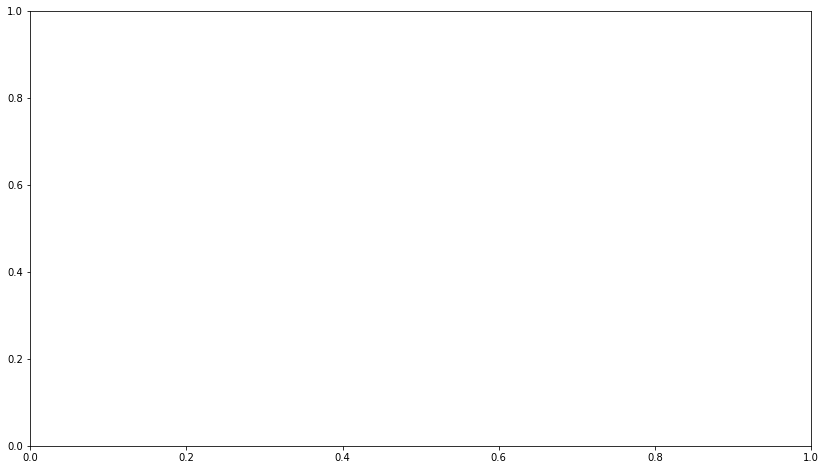

In [206]:
import matplotlib.pyplot as plt
f,a=plt.subplots(1,figsize=(14,8))
absi=range(14)
for i in P:
    a.plot(absi,ordo_p[i])
a.set(xlabel="Nombre de variables",ylabel='Variance expliquée',
      title="Variance expliquée en fonction du nombre d'axes de la PCA")
plt.legend([p for p in P])

On choisit donc p=33 et i=14

In [53]:
pca=PCA(12)
ventre=pca.fit_transform(train_.iloc[:,1:33])
print(ventre.shape)
ventre

(2443034, 12)


array([[ 1.01177367e+00, -5.91469411e-01,  4.88021228e-01, ...,
        -6.60578283e-03,  1.97375387e-02, -1.16724489e-03],
       [ 2.12955316e-01,  2.96915651e-01,  1.24129871e+00, ...,
        -9.15131948e-04, -1.13506890e-01,  2.67031071e-02],
       [-1.75922619e-01,  3.20837643e-02,  9.28196980e-01, ...,
        -1.05416280e-01, -1.28776803e-01,  3.35654685e-02],
       ...,
       [ 7.13432036e-01, -1.00699422e+00,  2.98063567e-01, ...,
        -8.80748049e-02, -6.55339994e-02,  1.89514133e-02],
       [ 3.84109963e-01,  1.01884676e+00,  5.95273596e-01, ...,
         1.10074700e-02, -1.34520130e-01,  1.97328948e-02],
       [ 9.43227432e-01, -5.45423299e-01,  4.49181374e-01, ...,
         2.33182329e-02,  1.80910315e-02,  2.08599770e-03]])

In [54]:
ventre=pd.DataFrame(ventre,columns=['ventre_'+str(i) for i in range(ventre.shape[1])])
train__=pd.concat([train_.iloc[:,0],pd.DataFrame(ventre),train_.iloc[:,33:]],axis=1)
train__

,0,ventre_0,ventre_1,ventre_2,ventre_3,ventre_4,ventre_5,ventre_6,ventre_7,ventre_8,ventre_9,ventre_10,ventre_11,33,34,35,36,37,38,39,40,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec
0,0.000000,1.011774,-0.591469,0.488021,0.510556,-0.444402,0.198387,0.545548,0.769158,0.155397,-0.006606,0.019738,-0.001167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.005215,0.0,0.0,0.0,0
1,0.048998,0.212955,0.296916,1.241299,0.227543,-0.247805,0.013655,-0.101384,-0.118657,0.079249,-0.000915,-0.113507,0.026703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.027724,0.0,0.0,0.0,0
2,0.022272,-0.175923,0.032084,0.928197,-0.481698,-0.048922,-0.260112,-0.017651,-0.048195,0.280094,-0.105416,-0.128777,0.033565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001293,0.014548,0.0,0.0,0.0,0
3,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019247,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.010705,0.0,0.0,0.0,0
4,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019247,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002154,0.007960,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,0.001114,1.114668,0.176993,-0.196045,0.309091,-0.236218,0.111081,-0.033960,-0.101596,-0.174101,0.037135,-0.003449,-0.004757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.028867,0.023058,0.0,0.0,0.0,0
2443030,0.001114,1.173399,0.048847,-0.097062,0.144797,0.293721,0.981983,0.368427,-0.496930,-0.051946,0.074873,-0.069582,0.008107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012495,0.024979,0.0,0.0,0.0,0
2443031,0.000000,0.713432,-1.006994,0.298064,-0.309809,0.226638,0.889741,1.310513,0.878454,0.641796,-0.088075,-0.065534,0.018951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.016744,0.0,0.0,0.0,0
2443032,0.001114,0.384110,1.018847,0.595274,0.134531,-0.159573,0.126530,-0.092664,-0.072608,0.083054,0.011007,-0.134520,0.019733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.000000,0.014548,0.0,0.0,0.0,0


In [58]:
len(np.unique(train.iloc[:,0].values))

def scaling(k,k_min,k_max):
    return (k-k_min)/(k_max-k_min)

def scaler(X,z=10):
    if len(np.unique(X.values)>2):
        from joblib import Parallel,delayed
        from functools import partial
        X_min=min(X)
        X_max=max(X)
        scal=partial(scaling,k_min=X_min,k_max=X_max)
        X_=Parallel(n_jobs=z)(delayed(scal)(X[i]) for i in range(len(X)))
        return X_
    else:
        return X

dico_scale={}
train_=train__.copy()
from joblib import Parallel,delayed
from functools import partial
import psutil
cpu=psutil.cpu_count()

start=time.time()
#for i in range(train_.shape[1]):
 #   if len(np.unique(train.iloc[:,i].values))>2:
 #       dico_scale[i]=scaler(train_.iloc[:,i])
  #      train_.iloc[:,i]=dico_scale[i]
    #else:
     #   continue
c=Parallel(n_jobs=cpu)(delayed(scaler,z=cpu)(train_.iloc[:,i]) for i in range(train_.shape[1]))
end=time.time()

print("Durée :",round((end-start)/60,2),"minutes")

#dico_scale.keys()

#train_.iloc[:,1:41]

Durée : 27.68 minutes


In [61]:
pd.DataFrame(c)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,...,2442929,2442930,2442931,2442932,2442933,2442934,2442935,2442936,2442937,2442938,2442939,2442940,2442941,2442942,2442943,2442944,2442945,2442946,2442947,2442948,2442949,2442950,2442951,2442952,2442953,2442954,2442955,2442956,2442957,2442958,2442959,2442960,2442961,2442962,2442963,2442964,2442965,2442966,2442967,2442968,2442969,2442970,2442971,2442972,2442973,2442974,2442975,2442976,2442977,2442978,2442979,2442980,2442981,2442982,2442983,2442984,2442985,2442986,2442987,2442988,2442989,2442990,2442991,2442992,2442993,2442994,2442995,2442996,2442997,2442998,2442999,2443000,2443001,2443002,2443003,2443004,2443005,2443006,2443007,2443008,2443009,2443010,2443011,2443012,2443013,2443014,2443015,2443016,2443017,2443018,2443019,2443020,2443021,2443022,2443023,2443024,2443025,2443026,2443027,2443028,2443029,2443030,2443031,2443032,2443033
0,0.000000,0.048998,0.022272,0.001114,0.001114,0.011136,0.011136,0.011136,0.011136,0.001114,0.001114,0.001114,0.022272,0.001114,0.001114,0.012249,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.010022,0.001114,0.001114,0.015590,0.011136,0.011136,0.011136,0.015590,0.011136,0.011136,0.011136,0.011136,0.015590,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.015590,0.011136,0.011136,0.011136,0.015590,0.011136,0.011136,0.015590,0.015590,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.015590,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.011136,0.015590,0.015590,0.001114,0.001114,0.015590,0.001114,0.001114,0.001114,0.011136,0.011136,0.015590,0.001114,0.001114,0.001114,0.001114,0.008909,0.008909,...,0.001114,0.001114,0.001114,0.011136,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.011136,0.001114,0.011136,0.001114,0.011136,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.000000,0.000000,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.001114,0.013363,0.001114,0.001114,0.001114,0.001114,0.008909,0.001114,0.001114,0.001114,0.011136,0.011136,0.001114,0.001114,0.011136,0.001114,0.001114,0.001114,0.001114,0.011136,0.011136,0.011136,0.001114,0.001114,0.001114,0.008909,0.000000,0.008909,0.000000,0.001114,0.001114,0.000000,0.001114,0.001114,0.001114,0.001114,0.001114,0.000000,0.001114,0.001114,0.001114,0.000000,0.001114,0.010022,0.000000,0.008909,0.000000,0.008909,0.000000,0.001114,0.010022,0.010022,0.000000,0.001114,0.001114,0.000000,0.008909,0.000000,0.001114,0.001114,0.000000,0.010022,0.000000,0.001114,0.001114,0.001114,0.000000,0.001114,0.010022
1,0.903363,0.523014,0.337854,0.767331,0.767331,0.685701,0.685701,0.685701,0.870725,0.980319,0.952355,0.419483,0.685701,0.419483,0.773449,0.685701,0.419483,0.419483,0.419483,0.098296,0.419483,0.767331,0.419483,0.767331,0.419483,0.767331,0.419483,0.767331,0.016666,0.172175,0.090546,0.172175,0.016666,0.172175,0.090546,0.172175,0.016666,0.172175,0.090546,0.172175,0.016666,0.172175,0.090546,0.172175,0.953318,0.748300,0.400452,0.400452,0.400452,0.748300,0.400452,0.400452,0.400452,0.400452,0.748300,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.748300,0.400452,0.400452,0.400452,0.748300,0.400452,0.400452,0.748300,0.748300,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.748300,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.400452,0.436923,0.870725,0.952355,0.952355,0.870725,0.952355,0.952355,0.806648,0.400452,0.400452,0.870725,0.952355,0.952355,0.419483,0.953318,0.748300,0.748300,..

### On vire les colonnes redondantes
A priori aucune après ce nouveau processing

In [0]:
def pandas_col_linear_dep(A):
    corr=[]
    for i in range(A.shape[1]):
        for j in range(A.shape[1]):
            a=np.corrcoef(A.iloc[:,i],A.iloc[:,j])[1][0]
            if (a==1) and (i!=j):
                corr.append([i,j])
    #a=[(np.corrcoef(A.iloc[:,i],A.iloc[:,j])[1][0],i,j) for i in A.shape[1] for j in A.shape[1] if
        #(i!=j) and (np.corrcoef(A.iloc[:,i],A.iloc[:,j])[1][0]==1)]
    return corr

start=time.time()
corr=pandas_col_linear_dep(train__)
end=time.time()
print('Durée :',round((end-start)/60,2),' minutes')

corr

In [0]:
if len(corr)>0:
    for i in corr[0:int(len(corr)/2)]:
        try:
            train__=train__.drop([str(i[1])],axis=1)
        except:
            continue

In [0]:
train__

## 2. Clustering non-supervisé
On peut faire varier le nombre de cluster, mais pour le moment, je l'ai fixé à 2 : conceptuellement les titres et le reste. Mais en termes machine cela peut être différent, on souhaite que la machine le perçoive comme nous. L'ajout d'un cluster peut être intéressant et aider à travailler sur les phrases qui se rapprochent des titres à cause des problèmes d'OCRisation ou autres par exemple

In [23]:
n_cluster=2

In [24]:
from sklearn.cluster import KMeans
kmeansmodel=KMeans(n_clusters=n_cluster,n_init=100,max_iter=500)
start=time.time()
kmeans=kmeansmodel.fit(train__)
end=time.time()
print('Durée :',round((end-start)/60,2),' minutes')
train__['label_k_2']=kmeans.labels_

Durée : 2.79  minutes


In [25]:
import pickle
da=dataiku.Folder('lZ0B3sSL')
pickle.dump(kmeans,open(da.get_path()+"/kmeans_model_2.pickle",'wb'))

In [26]:
import pickle
da=dataiku.Folder('lZ0B3sSL')
#pickle.dump(kmeans,open(da.get_path()+"/kmeans_model.pickle",'wb'))
kmeans_model=pickle.load(open(da.get_path()+"/kmeans_model.pickle",'rb'))
train__['label_k_1']=kmeans.labels_

Ne pas faire tourner les clusterings suivants

In [0]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_cluster,  n_init=100,
                            assign_labels='discretize')
start=time.time()
sc.fit(train.iloc[:,:-1])
end=time.time()
print('Durée :',round((end-start)/60,2),' minutes')
train['label_sc']=sc.labels_

In [0]:
from sklearn.cluster import DBSCAN
start=time.time()
clustering = DBSCAN(eps=0.1, min_samples=100).fit(train.iloc[:,:-1])
end=time.time()
print('Durée :',round((end-start)/60,2),' minutes')
train['label_dbs']=clustering.labels_

On réorganise la base et on la sauvegarde

In [28]:
train__

,0,ventre_0,ventre_1,ventre_2,ventre_3,ventre_4,ventre_5,ventre_6,ventre_7,ventre_8,ventre_9,ventre_10,ventre_11,33,34,35,36,37,38,39,40,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec,label_k_2,label_k_1
0,0.000000,1.011774,-0.591469,0.488021,0.510556,-0.444402,0.198387,0.545548,0.769158,0.155397,-0.006606,0.019738,-0.001167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.005215,0.0,0.0,0.0,0,0,0
1,0.048998,0.212955,0.296916,1.241299,0.227543,-0.247805,0.013655,-0.101384,-0.118657,0.079249,-0.000915,-0.113507,0.026703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.027724,0.0,0.0,0.0,0,0,0
2,0.022272,-0.175923,0.032084,0.928197,-0.481698,-0.048922,-0.260112,-0.017651,-0.048195,0.280094,-0.105416,-0.128777,0.033565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001293,0.014548,0.0,0.0,0.0,0,0,0
3,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019246,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.010705,0.0,0.0,0.0,0,0,0
4,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019247,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002154,0.007960,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,0.001114,1.114668,0.176993,-0.196045,0.309091,-0.236218,0.111081,-0.033960,-0.101596,-0.174101,0.037135,-0.003449,-0.004757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.028867,0.023058,0.0,0.0,0.0,0,0,0
2443030,0.001114,1.173399,0.048847,-0.097062,0.144797,0.293721,0.981983,0.368427,-0.496930,-0.051946,0.074873,-0.069582,0.008107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012495,0.024979,0.0,0.0,0.0,0,0,0
2443031,0.000000,0.713432,-1.006994,0.298064,-0.309809,0.226638,0.889741,1.310513,0.878454,0.641796,-0.088075,-0.065534,0.018951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.016744,0.0,0.0,0.0,0,0,0
2443032,0.001114,0.384110,1.018847,0.595274,0.134531,-0.159573,0.126530,-0.092664,-0.072608,0.083054,0.011007,-0.134520,0.019733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.000000,0.014548,0.0,0.0,0.0,0,0,0


In [29]:
#train__.columns=["0"]+['ventre_'+str(i) for i in range(ventre.shape[1])]+list(train__.columns[15:].values)
df=pd.concat([base.iloc[:,:2],base.loc[:,'phrase_2'],train__],axis=1)
df

,phrase,num_etude,phrase_2,0,ventre_0,ventre_1,ventre_2,ventre_3,ventre_4,ventre_5,ventre_6,ventre_7,ventre_8,ventre_9,ventre_10,ventre_11,33,34,35,36,37,38,39,40,f_mots,f_carac,html_carac,ind_sommaire,sommaire_longueur,sommaire_int,caractere_spec,label_k_2,label_k_1
0,<title>EI Munchhouse_V3</title>,1003691,EI Munchhouse_V3,0.000000,1.011774,-0.591469,0.488021,0.510556,-0.444402,0.198387,0.545548,0.769158,0.155397,-0.006606,0.019738,-0.001167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.005215,0.0,0.0,0.0,0,0,0
1,"<h1><a name=""bookmark0""></a><span class=""font2...",1003691,06,0.048998,0.212955,0.296916,1.241299,0.227543,-0.247805,0.013655,-0.101384,-0.118657,0.079249,-0.000915,-0.113507,0.026703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.027724,0.0,0.0,0.0,0,0,0
2,"<p><span class=""font20"" style=""font-weight:bol...",1003691,2019,0.022272,-0.175923,0.032084,0.928197,-0.481698,-0.048922,-0.260112,-0.017651,-0.048195,0.280094,-0.105416,-0.128777,0.033565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001293,0.014548,0.0,0.0,0.0,0,0,0
3,"<p><span class=""font14"">Agence Aquitaine</span...",1003691,Agence Aquitaine,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019246,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.006463,0.010705,0.0,0.0,0.0,0,0,0
4,"<p><span class=""font14"">SAFEGE</span></p>",1003691,SAFEGE,0.001114,0.726076,-0.087353,-0.508347,-0.399681,-0.037802,-0.162331,0.048796,-0.031487,0.027015,-0.065471,-0.019247,0.002232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002154,0.007960,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443029,"<span class=""font21"">Disponible sur le site de...",238301,Disponible sur le site de Réseau de Transport ...,0.001114,1.114668,0.176993,-0.196045,0.309091,-0.236218,0.111081,-0.033960,-0.101596,-0.174101,0.037135,-0.003449,-0.004757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.028867,0.023058,0.0,0.0,0.0,0,0,0
2443030,"<a href=""http://www.clefdeschamps.info/""><span...",238301,http://www.clefdeschamps.info/,0.001114,1.173399,0.048847,-0.097062,0.144797,0.293721,0.981983,0.368427,-0.496930,-0.051946,0.074873,-0.069582,0.008107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012495,0.024979,0.0,0.0,0.0,0,0,0
2443031,"<p><sup><a href=""#footnote14"">14</a></sup><a n...",238301,14,0.000000,0.713432,-1.006994,0.298064,-0.309809,0.226638,0.889741,1.310513,0.878454,0.641796,-0.088075,-0.065534,0.018951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000431,0.016744,0.0,0.0,0.0,0,0,0
2443032,"<span class=""font0"" style=""font-weight:bold;"">...",238301,,0.001114,0.384110,1.018847,0.595274,0.134531,-0.159573,0.126530,-0.092664,-0.072608,0.083054,0.011007,-0.134520,0.019733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002841,0.000000,0.014548,0.0,0.0,0.0,0,0,0


In [30]:
base_classif_Kmeans_1_df = df # For this sample code, simply copy input to output
da=dataiku.Folder('lZ0B3sSL')
pickle.dump(base_classif_Kmeans_1_df,open(da.get_path()+"/base_pour_Bagging_final.pickle",'wb'))


# Write recipe outputs
base_classif_Kmeans_1 = dataiku.Dataset("base_classif_Kmeans_1")
base_classif_Kmeans_1.write_with_schema(base_classif_Kmeans_1_df)

2443034 rows successfully written (EDpTSu3JYB)
